In [483]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.cluster import KMeans

#functions
import wrangle as wr

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Acquire csv files from 
https://data.world/uci/wine-quality

### Read csv files
- red wine csv
- white wine csv

#### Features/data dictionary
1. fixed_acidity       -  decimal
2. volatile_acidity    -  decimal
3. citric_acid         -  decimal
4. residual_sugar      -  decimal
5. chlorides -decimal
6. free_sulfur_dioxide -  decimal
7. total_sulfur_dioxide-  decimal
8. density             -  decimal
9. ph -decimal
10. sulphates           -  decimal
11. alcohol             -  decimal

#### Target Variable
12. quality             -  integer


In [10]:
#read in csv
#values in csv are separated by semicolon, call that argument with sep=';'
red = pd.read_csv('codeup-wine-quality-project/winequality-red.csv', sep= ';')

In [11]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Analyze/view the data 
- check for nulls
- rename columns
- learn about size/attributes/components
- check for duplicates

In [13]:
#null check
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [391]:
duplicate = red[red.duplicated()]

In [392]:
duplicate

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [393]:
red.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [16]:
#getting rid of spaces in the features
red = red.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})


In [396]:
red.describe().T

count       mean        std      min      25%      50%  \
fixed_acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile_acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric_acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual_sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free_sulfur_dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total_sulfur_dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
quality               1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                           75%        max  
fixed_acidity          9.20000   15.90000  
volatile_acidity       0.64000    1.58000  
citric_acid            0.43000    1.00000  
residual_sugar         2.60000   15.50000  
chlorides              0.09100    0.61100  
free_sulfur_dioxide   21.00000   72.00000  
total_sulfur_dioxide  63.00000  289.00000  
density                0.99782    1.00369  
pH                     3.40000    4.01000  
sulphates              0.73000    2.00000  
alcohol               11.10000   14.90000  
quality                6.00000    8.00000

### Exploratory Data Analysis
- do an initial exploration
- identify potential correlations
- identify outliers
- remove outliers
- split data
- run statistical tests/hypothesis testing
- identify key features
- implement feature engineering


<AxesSubplot:>

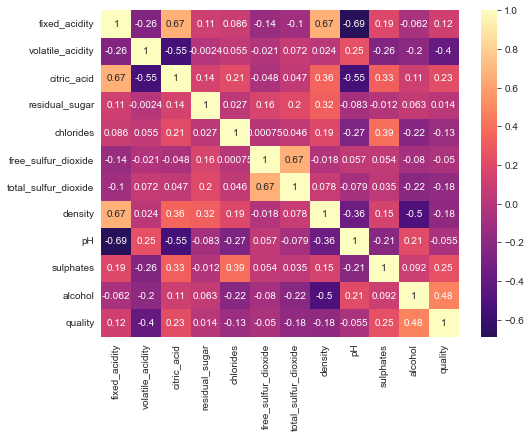

In [397]:
plt.figure(figsize=(8,6))
sns.heatmap(red.corr(), cmap='magma', center= 0, annot=True)

#### Heatmap takeaways:
1. strong pos correlation between alcohol and quality
2. pos correlation between sulphates/citric acid/fixed acidity and quality
3. neg correlation between ph/density/chlorides and quality
4. strong neg correlation between volatile_acidity and quality
5. ph and fixed/volatile_acidity as expected are correlated
6. fixed_acidity and density/citric_acid are strongly correlated
7. residual_sugar and density are correlated
8. chlorides and sulphates are correlated
9. free_sulfur_dioxide and total SO2 as expected are correlated
10. residual_sugar and total_sulfur_dioxide are strongly negatively correlated
11. density and alcohol/ph are strongly negatively correlated
12. density and residual_sugar/citric_acid are pos correlated
13. ph and alcohol/volatile_acidity are pos correlated
14. ph and sulphates/chlorides/citric_acid/fixed_acidity are neg correlated, as expected -> compounds effect ph
15. sulfates and citric_acid/fixed_acidity are pos correlated
16. alcohol and total_sulfur_dioxide/chlorides/volatile_acidity are neg correlated
17. alcohol and sulphates/citric_acid are pos correlated

In [32]:
sns.set_style("whitegrid")

(<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>,)

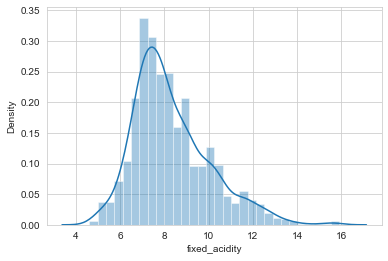

In [398]:
#check distribution with distplots
sns.distplot(red['fixed_acidity']),

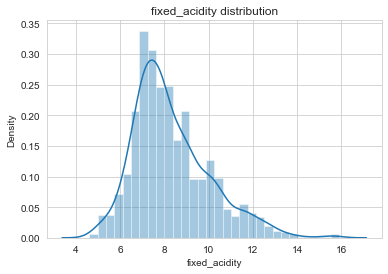

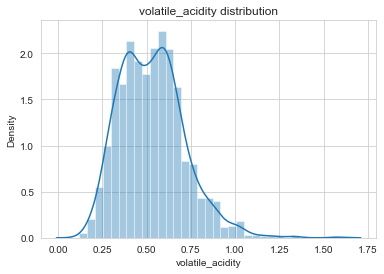

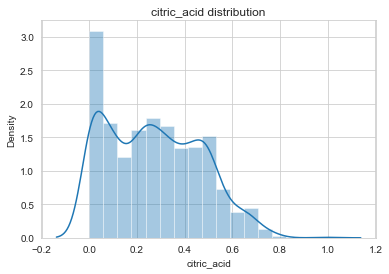

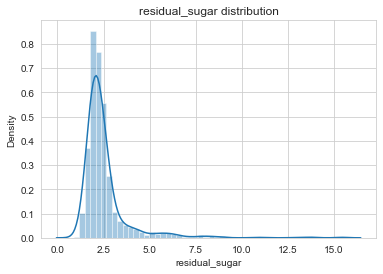

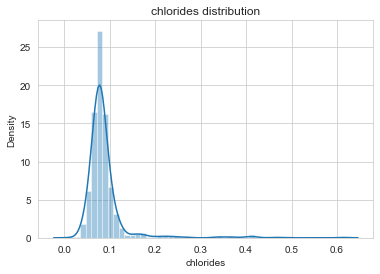

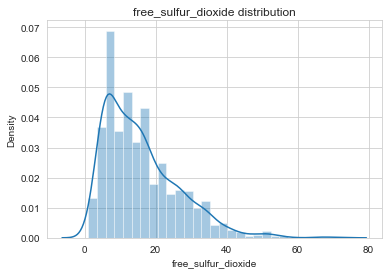

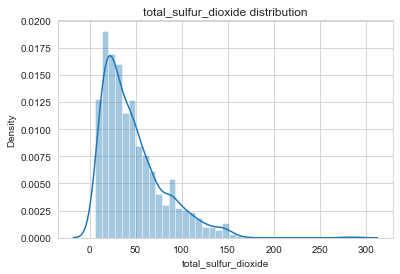

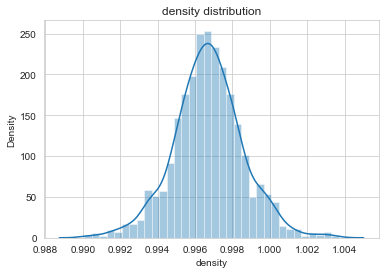

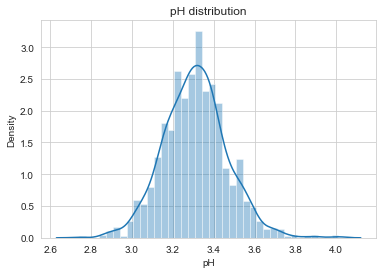

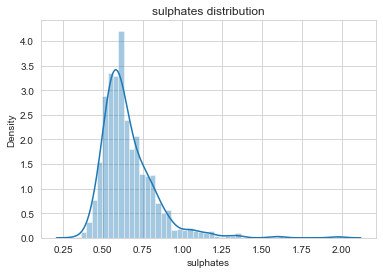

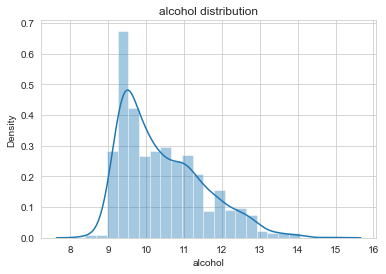

In [399]:
#boxplots of distributions
sns.distplot(red.fixed_acidity);
plt.title("fixed_acidity distribution")
plt.show()
sns.distplot(red.volatile_acidity);
plt.title("volatile_acidity distribution")
plt.show()
sns.distplot(red.citric_acid);
plt.title("citric_acid distribution")
plt.show()
sns.distplot(red.residual_sugar);
plt.title("residual_sugar distribution")
plt.show()
sns.distplot(red.chlorides);
plt.title("chlorides distribution")
plt.show()
sns.distplot(red.free_sulfur_dioxide);
plt.title("free_sulfur_dioxide distribution")
plt.show()
sns.distplot(red.total_sulfur_dioxide);
plt.title("total_sulfur_dioxide distribution")
plt.show()
sns.distplot(red.density);
plt.title("density distribution")
plt.show()
sns.distplot(red.pH);
plt.title("pH distribution")
plt.show()
sns.distplot(red.sulphates);
plt.title("sulphates distribution")
plt.show()
sns.distplot(red.alcohol);
plt.title("alcohol distribution")
plt.show()

<AxesSubplot:xlabel='fixed_acidity'>

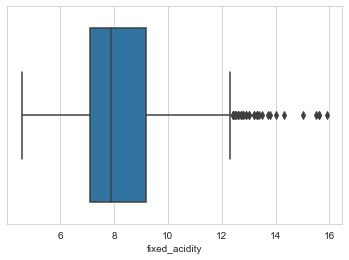

In [400]:
#checking for outliers with boxplots
sns.boxplot(x='fixed_acidity', data=red)

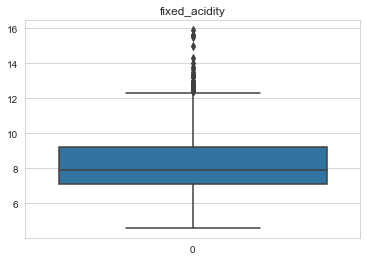

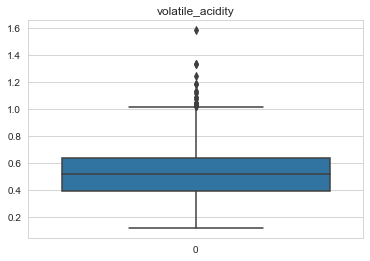

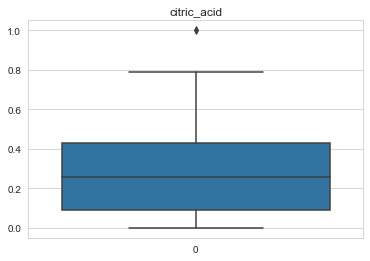

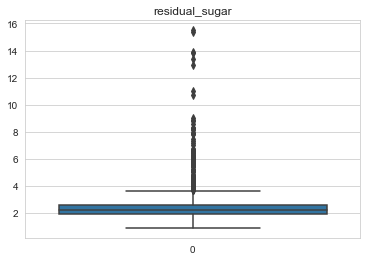

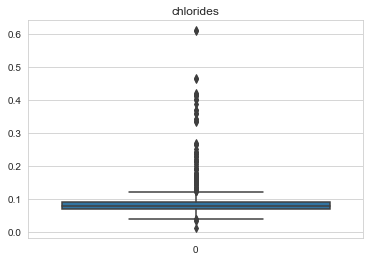

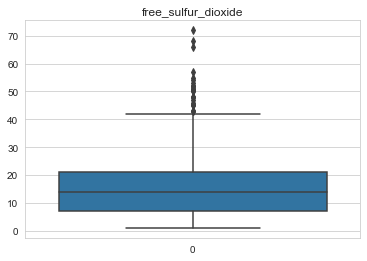

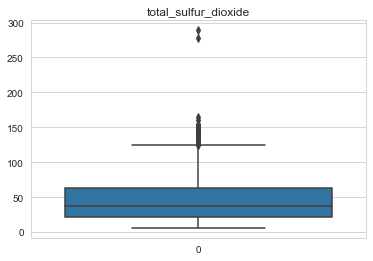

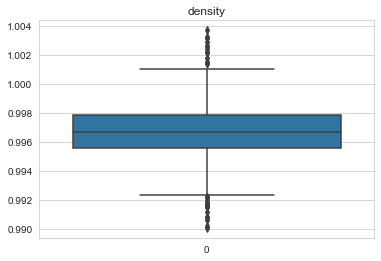

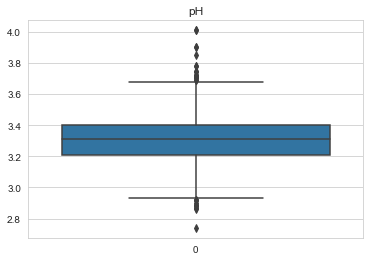

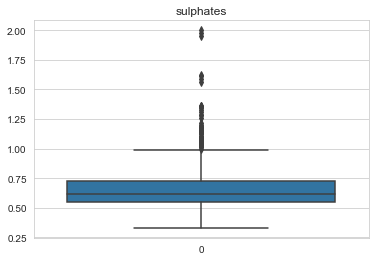

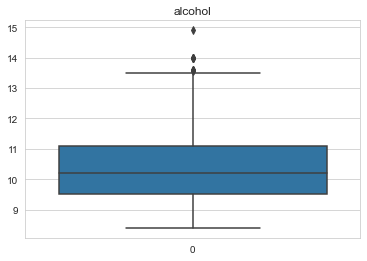

In [401]:
#boxplots of features
sns.boxplot(data=red.fixed_acidity);
plt.title("fixed_acidity")
plt.show()
sns.boxplot(data=red.volatile_acidity);
plt.title("volatile_acidity")
plt.show()
sns.boxplot(data=red.citric_acid);
plt.title("citric_acid")
plt.show()
sns.boxplot(data=red.residual_sugar);
plt.title("residual_sugar")
plt.show()
sns.boxplot(data=red.chlorides);
plt.title("chlorides")
plt.show()
sns.boxplot(data=red.free_sulfur_dioxide);
plt.title("free_sulfur_dioxide")
plt.show()
sns.boxplot(data=red.total_sulfur_dioxide);
plt.title("total_sulfur_dioxide")
plt.show()
sns.boxplot(data=red.density);
plt.title("density")
plt.show()
sns.boxplot(data=red.pH);
plt.title("pH")
plt.show()
sns.boxplot(data=red.sulphates);
plt.title("sulphates")
plt.show()
sns.boxplot(data=red.alcohol);
plt.title("alcohol")
plt.show()


#### Looks like there are some outliers that we should handle

In [497]:
#
red[red.volatile_acidity > .8
   ].quality.value_counts()

5    50
6    20
4    17
3     6
7     4
8     1
Name: quality, dtype: int64

In [423]:
red[red.residual_sugar > 5
   ].quality.value_counts()

5    28
6    18
7    14
4     3
8     2
3     1
Name: quality, dtype: int64

In [440]:
red[red.chlorides > .02
   ].quality.value_counts()

5    577
6    535
7    166
4     53
8     17
3     10
Name: quality, dtype: int64

In [ ]:
red[red.residual_sugar > 5
   ].quality.value_counts()

In [403]:
#utilize helper function to split df, stratified on target, return train df, as well as 
train, X_train, X_validate, X_test, y_train, y_validate, y_test = wr.split(red, 'quality')

In [404]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1062            8.0             0.380         0.44             1.9      0.098   
352             7.7             0.665         0.00             2.4      0.090   
394            12.7             0.600         0.65             2.3      0.063   
576             9.9             0.500         0.24             2.3      0.103   
215             7.0             0.490         0.49             5.6      0.060   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1062                  6.0                  15.0   0.9956  3.30       0.64   
352                   8.0                  19.0   0.9974  3.27       0.73   
394                   6.0                  25.0   0.9997  3.03       0.57   
576                   6.0                  14.0   0.9978  3.34       0.52   
215                  26.0                 121.0   0.9974  3.34       0.76   

      alcohol  quality  
1062     11.4        6  
352       9.3        5  
394       9.9        5  
576      10.0        4  
215      10.5        5

In [405]:
train.shape

(760, 12)

In [264]:
train['log_density_feature'] = np.exp(train.density)

In [265]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
417             7.0              0.58         0.12             1.9      0.091   
546             7.5              0.55         0.24             2.0      0.078   
516            12.5              0.60         0.49             4.3      0.100   
86              8.6              0.49         0.28             1.9      0.110   
1100            8.4              0.34         0.42             2.1      0.072   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
417                  34.0                 124.0  0.99560  3.44       0.48   
546                  10.0                  28.0  0.99830  3.45       0.78   
516                   5.0                  14.0  1.00100  3.25       0.74   
86                   20.0                 136.0  0.99720  2.93       1.95   
1100                 23.0                  36.0  0.99392  3.11       0.78   

      alcohol  quality  log_density_feature  
417      10.5        5             2.706348  
546       9.5        6             2.713665  
516      11.9        6             2.721001  
86        9.9        6             2.710681  
1100     12.4        6             2.701805

In [184]:
X_train_scaled_df.describe().T

count      mean       std       min       25%  50%  \
fixed_acidity         895.0  0.155680  0.813294 -1.476190 -0.428571  0.0   
volatile_acidity      895.0  0.026885  0.766333 -1.708333 -0.541667  0.0   
citric_acid           895.0  0.040782  0.608550 -0.812500 -0.500000  0.0   
residual_sugar        895.0  0.486353  1.886973 -1.857143 -0.428571  0.0   
chlorides             895.0  0.413408  2.547621 -3.400000 -0.500000  0.0   
free_sulfur_dioxide   895.0  0.197366  0.741099 -0.857143 -0.428571  0.0   
total_sulfur_dioxide  895.0  0.204170  0.811811 -0.780488 -0.390244  0.0   
density               895.0 -0.013141  0.876688 -3.210526 -0.507177  0.0   
pH                    895.0 -0.016866  0.742210 -2.714286 -0.523810  0.0   
sulphates             895.0  0.212225  1.065182 -1.470588 -0.411765  0.0   
alcohol               895.0  0.188117  0.665827 -1.062500 -0.375000  0.0   

                           75%        max  
fixed_acidity         0.571429   3.571429  
volatile_acidity      0.458333   3.333333  
citric_acid           0.500000   2.312500  
residual_sugar        0.571429  16.714286  
chlorides             0.500000  26.550000  
free_sulfur_dioxide   0.571429   3.785714  
total_sulfur_dioxide  0.609756   6.121951  
density               0.492823   3.047847  
pH                    0.476190   3.333333  
sulphates             0.588235   8.117647  
alcohol               0.625000   2.437500

In [ ]:
# import plotly.express as px
# xf = df[(df.quality > 7)| (df.quality < 5)]
# fig = px.scatter_3d(xf, 
#                     x='alcohol', 
#                     y='fixed_acidity', 
#                     z='volatile_acidity',
#                     color='quality'
#                     )
# fig.update_layout(width=700, height=500)
# fig.update_layout(margin={"r":0,"t":0,"l":10,"b":0})
# fig.show()

In [165]:
train.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
log_density_feature     0
dtype: int64

In [166]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
417             7.0              0.58         0.12             1.9      0.091   
546             7.5              0.55         0.24             2.0      0.078   
516            12.5              0.60         0.49             4.3      0.100   
86              8.6              0.49         0.28             1.9      0.110   
1100            8.4              0.34         0.42             2.1      0.072   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
417                  34.0                 124.0  0.99560  3.44       0.48   
546                  10.0                  28.0  0.99830  3.45       0.78   
516                   5.0                  14.0  1.00100  3.25       0.74   
86                   20.0                 136.0  0.99720  2.93       1.95   
1100                 23.0                  36.0  0.99392  3.11       0.78   

      alcohol  quality  log_density_feature  
417      10.5        5           522.162655  
546       9.5        6          1353.310200  
516      11.9        6         -2303.736194  
86        9.9        6           821.199988  
1100     12.4        6           377.562191

<AxesSubplot:>

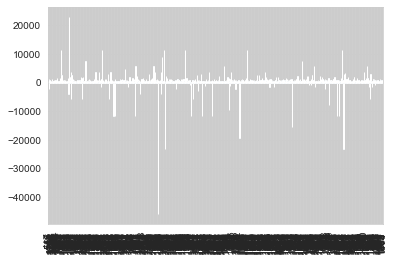

In [167]:
train['log_density_feature'].plot(kind='bar')

# Statistical testing

In [118]:
def correlation_test(Ho, Ha, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = Ho
    alternative_hypothesis = Ha
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("there is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("there is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

### 1. strong pos correlation between alcohol and quality

In [119]:
#assign your null hypothesis
Ho = "No correlation between alcohol and quality."

#and your alternative hypothesis
Ha = "There is a correlation between alcohol and quality."

#the feature you are testing
x1 = train.alcohol

#against your target
y1 = train.quality

Reject null statment: No correlation between alcohol and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.5058275857220219
    p: 2.5965006260626788e-59
    
    


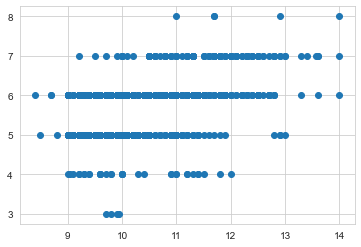

In [120]:
correlation_test(Ho, Ha, x1, y1)

### 2. pos correlation between sulphates/citric acid/fixed acidity and quality

In [123]:
#assign your null hypothesis
Ho = "No correlation between sulphates and quality."

#and your alternative hypothesis
Ha = "There is a correlation between sulphates and quality."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.quality

Reject null statment: No correlation between sulphates and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
    
    


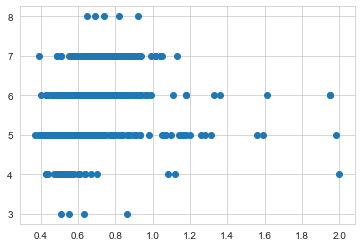

In [124]:
correlation_test(Ho, Ha, x1, y1)

In [126]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and quality."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and quality."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.quality

Reject null statment: No correlation between citric_acid and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
    
    


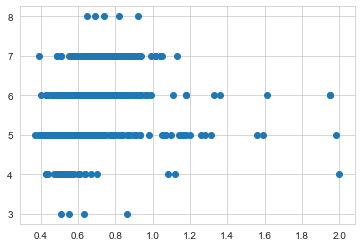

In [127]:
correlation_test(Ho, Ha, x1, y1)

In [130]:
#assign your null hypothesis
Ho = "No correlation between fixed_acidity and quality."

#and your alternative hypothesis
Ha = "There is a correlation between fixed_acidity and quality."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.quality

Reject null statment: No correlation between fixed_acidity and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.11803244569675303
    p: 0.0004023084389424685
    
    


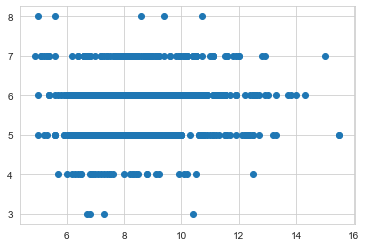

In [131]:
correlation_test(Ho, Ha, x1, y1)

### 3. neg correlation between ph/density/chlorides and quality

In [478]:
#assign your null hypothesis
Ho = "No correlation between pH and quality."

#and your alternative hypothesis
Ha = "There is a correlation between pH and quality."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.quality

Fail to reject the null hypothesis.

    Correlation Coefficient: -0.03698475749356612
    p: 0.3085498747389887
    
    


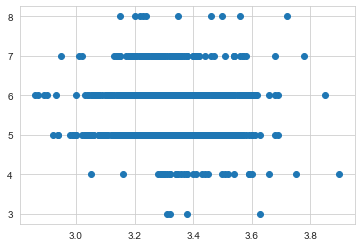

In [479]:
correlation_test(Ho, Ha, x1, y1)

In [135]:
#assign your null hypothesis
Ho = "No correlation between density and quality."

#and your alternative hypothesis
Ha = "There is a correlation between density and quality."

#the feature you are testing
x1 = train.density

#against your target
y1 = train.quality

Reject null statment: No correlation between density and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.174558404107124
    p: 1.4779499074184612e-07
    
    


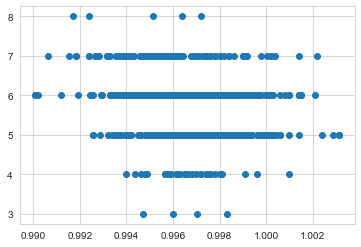

In [136]:
correlation_test(Ho, Ha, x1, y1)

In [168]:
#assign your null hypothesis
Ho = "No correlation between chlorides and quality."

#and your alternative hypothesis
Ha = "There is a correlation between chlorides and quality."

#the feature you are testing
x1 = train.chlorides

#against your target
y1 = train.quality

Reject null statment: No correlation between chlorides and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.1460824605018894
    p: 1.1453779437218817e-05
    
    


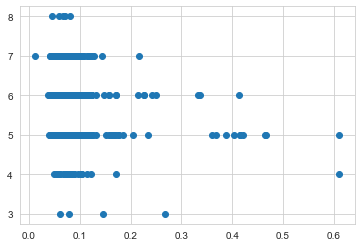

In [169]:
correlation_test(Ho, Ha, x1, y1)

### 4. strong neg correlation between volatile_acidity and quality

In [185]:
#assign your null hypothesis
Ho = "No correlation between volatile_acidity and quality."

#and your alternative hypothesis
Ha = "There is a correlation between volatile_acidity and quality."

#the feature you are testing
x1 = train.volatile_acidity

#against your target
y1 = train.quality

Reject null statment: No correlation between volatile_acidity and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3584259210477414
    p: 1.603311510782249e-28
    
    


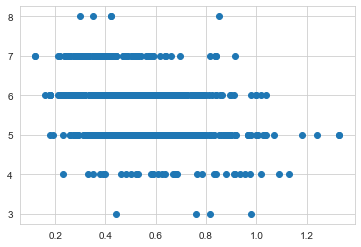

In [186]:
correlation_test(Ho, Ha, x1, y1)

### 5. ph and fixed/volatile_acidity as expected are correlated

In [205]:
#assign your null hypothesis
Ho = "No correlation between volatile_acidity and pH."

#and your alternative hypothesis
Ha = "There is a correlation between volatile_acidity and pH."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.volatile_acidity

Reject null statment: No correlation between volatile_acidity and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2275161966675603
    p: 5.677707664026978e-12
    
    


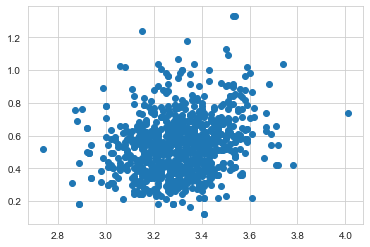

In [206]:
correlation_test(Ho, Ha, x1, y1)

In [207]:
#assign your null hypothesis
Ho = "No correlation between fixed_acidity and pH."

#and your alternative hypothesis
Ha = "There is a correlation between fixed_acidity and pH."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.fixed_acidity

Reject null statment: No correlation between fixed_acidity and pH.
There is a linear relationship.
That is a stronger negative correlation.

    Correlation Coefficient: -0.6774772046025654
    p: 2.994590335706951e-121
    
    


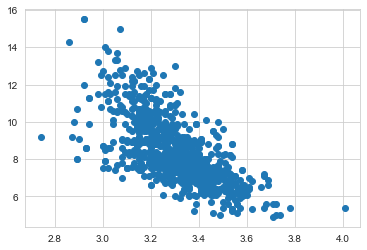

In [208]:
correlation_test(Ho, Ha, x1, y1)

### 6. fixed_acidity and density/citric_acid are strongly correlated

In [211]:
#assign your null hypothesis
Ho = "No correlation between density and fixed_acidity."

#and your alternative hypothesis
Ha = "There is a correlation between density and fixed_acidity."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.density

Reject null statment: No correlation between density and fixed_acidity.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6584479857364895
    p: 2.4694591590028873e-112
    
    


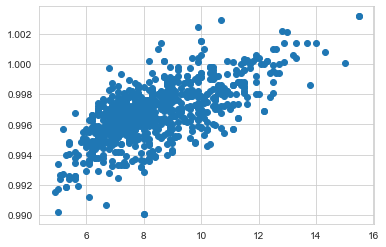

In [212]:
correlation_test(Ho, Ha, x1, y1)

In [213]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and fixed_acidity."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and quality."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.citric_acid

Reject null statment: No correlation between citric_acid and fixed_acidity.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6591636479951968
    p: 1.17234854741529e-112
    
    


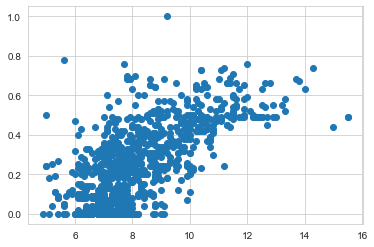

In [214]:
correlation_test(Ho, Ha, x1, y1)

### 7. residual_sugar and density are correlated

In [215]:
#assign your null hypothesis
Ho = "No correlation between density and residual_sugar."

#and your alternative hypothesis
Ha = "There is a correlation between density and residual_sugar."

#the feature you are testing
x1 = train.residual_sugar

#against your target
y1 = train.density

Reject null statment: No correlation between density and residual_sugar.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3022513242796895
    p: 2.3129680662788886e-20
    
    


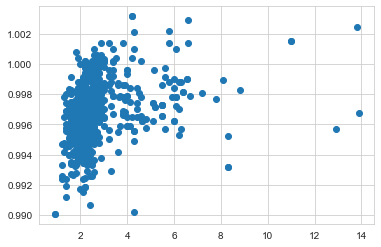

In [216]:
correlation_test(Ho, Ha, x1, y1)

### 8. chlorides and sulphates are correlated

In [217]:
#assign your null hypothesis
Ho = "No correlation between sulphates and chlorides."

#and your alternative hypothesis
Ha = "There is a correlation between sulphates and chlorides."

#the feature you are testing
x1 = train.chlorides

#against your target
y1 = train.sulphates

Reject null statment: No correlation between sulphates and chlorides.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.41406803754829646
    p: 2.1665488025886728e-38
    
    


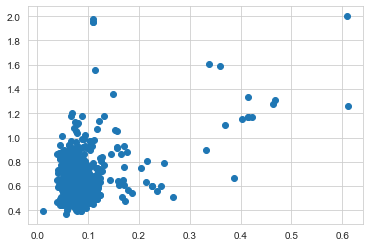

In [218]:
correlation_test(Ho, Ha, x1, y1)

### 9. free_sulfur_dioxide and total SO2 as expected are correlated

In [219]:
#assign your null hypothesis
Ho = "No correlation between total_sulfur_dioxide and free_sulfur_dioxide."

#and your alternative hypothesis
Ha = "There is a correlation between total_sulfur_dioxide and free_sulfur_dioxide."

#the feature you are testing
x1 = train.free_sulfur_dioxide

#against your target
y1 = train.total_sulfur_dioxide

Reject null statment: No correlation between total_sulfur_dioxide and free_sulfur_dioxide.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6639099108524389
    p: 7.954306465817756e-115
    
    


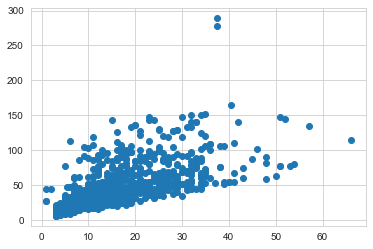

In [220]:
correlation_test(Ho, Ha, x1, y1)

### 10. density and alcohol/ph are strongly negatively correlated

In [221]:
#assign your null hypothesis
Ho = "No correlation between alcohol and density."

#and your alternative hypothesis
Ha = "There is a correlation between alcohol and density."

#the feature you are testing
x1 = train.alcohol

#against your target
y1 = train.density

Reject null statment: No correlation between alcohol and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.4856180838868558
    p: 3.838446787937727e-54
    
    


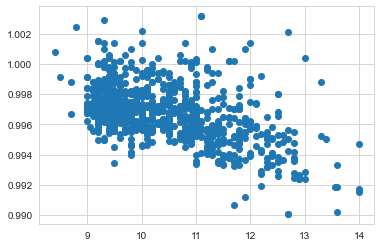

In [222]:
correlation_test(Ho, Ha, x1, y1)

In [223]:
#assign your null hypothesis
Ho = "No correlation between pH and density."

#and your alternative hypothesis
Ha = "There is a correlation between pH and density."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.density

Reject null statment: No correlation between pH and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3055236891962556
    p: 8.603892836217704e-21
    
    


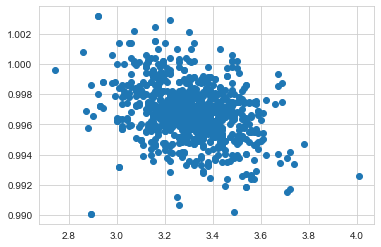

In [224]:
correlation_test(Ho, Ha, x1, y1)

### 10. residual_sugar and total_sulfur_dioxide are strongly negatively correlated

In [266]:
#assign your null hypothesis
Ho = "No correlation between total_sulfur_dioxide and residual_sugar."

#and your alternative hypothesis
Ha = "There is a correlation between total_sulfur_dioxide and residual_sugar."

#the feature you are testing
x1 = train.total_sulfur_dioxide

#against your target
y1 = train.residual_sugar

Reject null statment: No correlation between total_sulfur_dioxide and residual_sugar.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.21928953269875423
    p: 3.309341101606457e-11
    
    


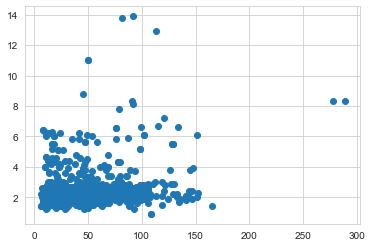

In [267]:
correlation_test(Ho, Ha, x1, y1)

### 11. density and alcohol/ph are strongly negatively correlated

In [270]:
#assign your null hypothesis
Ho = "No correlation between alcohol and density."

#and your alternative hypothesis
Ha = "There is a correlation between alcohol and density."

#the feature you are testing
x1 = train.alcohol

#against your target
y1 = train.density

Reject null statment: No correlation between alcohol and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.4856180838868558
    p: 3.838446787937727e-54
    
    


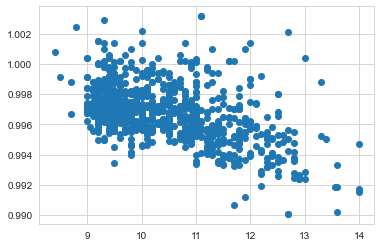

In [271]:
correlation_test(Ho, Ha, x1, y1)

In [274]:
#assign your null hypothesis
Ho = "No correlation between pH and density."

#and your alternative hypothesis
Ha = "There is a correlation between pH and density."

#the feature you are testing
x1 = train.pH

#against your target
y1 = train.density

Reject null statment: No correlation between pH and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3055236891962556
    p: 8.603892836217704e-21
    
    


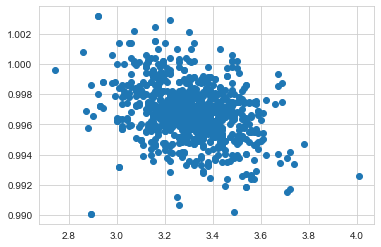

In [275]:
correlation_test(Ho, Ha, x1, y1)

### 12. density and residual_sugar/citric_acid are pos correlated

In [276]:
#assign your null hypothesis
Ho = "No correlation between residual_sugar and density."

#and your alternative hypothesis
Ha = "There is a correlation between residual_sugar and density."

#the feature you are testing
x1 = train.residual_sugar

#against your target
y1 = train.density

Reject null statment: No correlation between residual_sugar and density.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3022513242796895
    p: 2.3129680662788886e-20
    
    


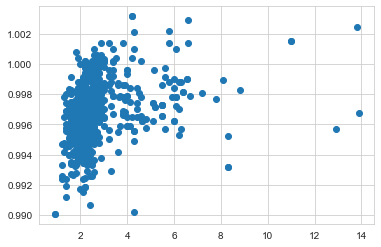

In [277]:
correlation_test(Ho, Ha, x1, y1)

In [278]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and density."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and density."

#the feature you are testing
x1 = train.citric_acid

#against your target
y1 = train.density

Reject null statment: No correlation between citric_acid and density.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.34543531704713987
    p: 1.7562582408784856e-26
    
    


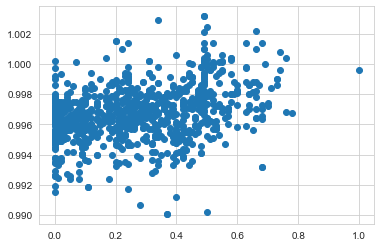

In [279]:
correlation_test(Ho, Ha, x1, y1)

### 13. ph and alcohol/volatile_acidity are pos correlated

In [280]:
#assign your null hypothesis
Ho = "No correlation between alcohol and pH."

#and your alternative hypothesis
Ha = "There is a correlation between alcohol and pH."

#the feature you are testing
x1 = train.alcohol

#against your target
y1 = train.pH

Reject null statment: No correlation between alcohol and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.17821748952438296
    p: 7.995740759796008e-08
    
    


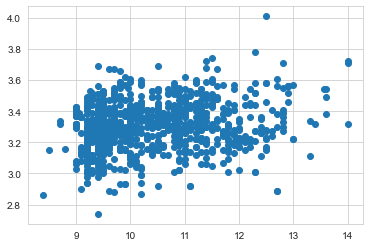

In [281]:
correlation_test(Ho, Ha, x1, y1)

In [282]:
#assign your null hypothesis
Ho = "No correlation between volatile_acidity and pH."

#and your alternative hypothesis
Ha = "There is a correlation between volatile_acidity and pH."

#the feature you are testing
x1 = train.volatile_acidity

#against your target
y1 = train.pH

Reject null statment: No correlation between volatile_acidity and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2275161966675603
    p: 5.677707664026978e-12
    
    


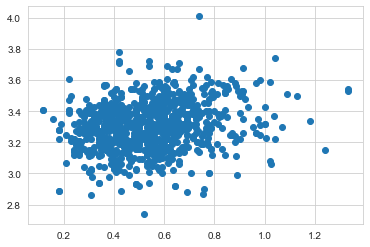

In [283]:
correlation_test(Ho, Ha, x1, y1)

### 14. ph and sulphates/chlorides/citric_acid/fixed_acidity are neg correlated, as expected -> compounds effect ph

In [284]:
#assign your null hypothesis
Ho = "No correlation between sulphates and pH."

#and your alternative hypothesis
Ha = "There is a correlation between sulphates and pH."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.pH

Reject null statment: No correlation between sulphates and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.23916336733159424
    p: 4.1548865958634193e-13
    
    


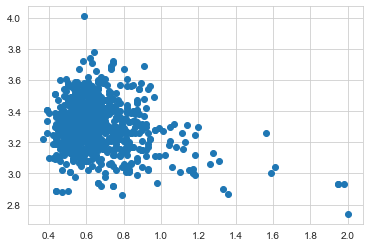

In [285]:
correlation_test(Ho, Ha, x1, y1)

In [286]:
#assign your null hypothesis
Ho = "No correlation between chlorides and pH."

#and your alternative hypothesis
Ha = "There is a correlation between chlorides and pH."

#the feature you are testing
x1 = train.chlorides

#against your target
y1 = train.pH

Reject null statment: No correlation between chlorides and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.27891352459231644
    p: 1.8676183371616188e-17
    
    


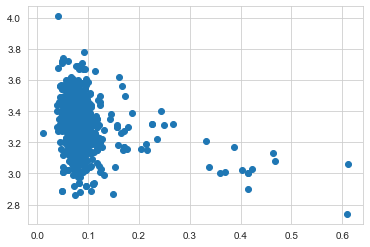

In [287]:
correlation_test(Ho, Ha, x1, y1)

In [288]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and pH."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and pH."

#the feature you are testing
x1 = train.citric_acid

#against your target
y1 = train.pH

Reject null statment: No correlation between citric_acid and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.5413206361250693
    p: 2.817442656268688e-69
    
    


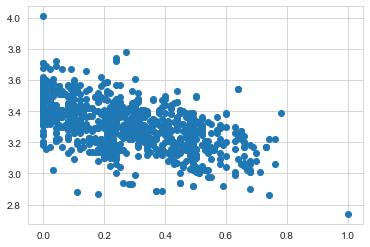

In [289]:
correlation_test(Ho, Ha, x1, y1)

In [290]:
#assign your null hypothesis
Ho = "No correlation between fixed_acidity and pH."

#and your alternative hypothesis
Ha = "There is a correlation between fixed_acidity and pH."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.pH

Reject null statment: No correlation between fixed_acidity and pH.
There is a linear relationship.
That is a stronger negative correlation.

    Correlation Coefficient: -0.6774772046025654
    p: 2.994590335706951e-121
    
    


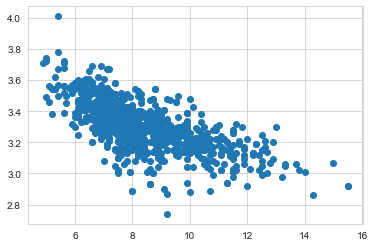

In [291]:
correlation_test(Ho, Ha, x1, y1)

### 15. sulphates and citric_acid/fixed_acidity are pos correlated

In [296]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and sulphates."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and sulphates."

#the feature you are testing
x1 = train.citric_acid

#against your target
y1 = train.sulphates

Reject null statment: No correlation between citric_acid and sulphates.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3103433383861657
    p: 1.959592767310798e-21
    
    


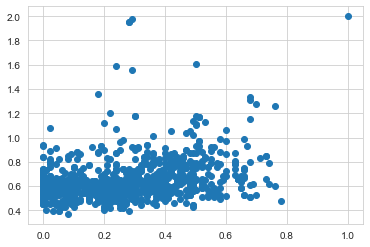

In [297]:
correlation_test(Ho, Ha, x1, y1)

In [298]:
#assign your null hypothesis
Ho = "No correlation between fixed_acidity and sulphates."

#and your alternative hypothesis
Ha = "There is a correlation between fixed_acidity and sulphates."

#the feature you are testing
x1 = train.fixed_acidity

#against your target
y1 = train.sulphates

Reject null statment: No correlation between fixed_acidity and sulphates.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.19634638022541145
    p: 3.1506644894300042e-09
    
    


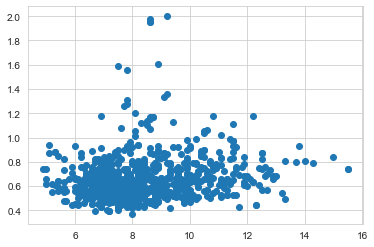

In [299]:
correlation_test(Ho, Ha, x1, y1)

### 16. alcohol and total_sulfur_dioxide/chlorides/volatile_acidity are neg correlated

In [300]:
#assign your null hypothesis
Ho = "No correlation between total_sulfur_dioxide and alcohol."

#and your alternative hypothesis
Ha = "There is a correlation between total_sulfur_dioxide and alcohol."

#the feature you are testing
x1 = train.total_sulfur_dioxide

#against your target
y1 = train.alcohol

Reject null statment: No correlation between total_sulfur_dioxide and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.17560444195612174
    p: 1.2415217414599543e-07
    
    


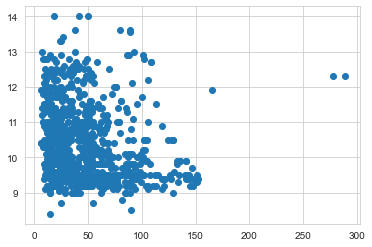

In [301]:
correlation_test(Ho, Ha, x1, y1)

In [303]:
#assign your null hypothesis
Ho = "No correlation between chlorides and alcohol."

#and your alternative hypothesis
Ha = "There is a correlation between chlorides and alcohol."

#the feature you are testing
x1 = train.chlorides

#against your target
y1 = train.alcohol

Reject null statment: No correlation between chlorides and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.21703773215778008
    p: 5.297594732143102e-11
    
    


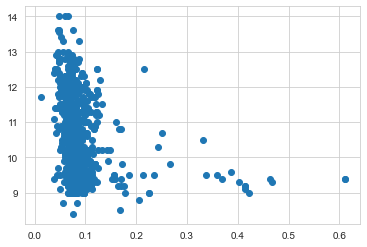

In [304]:
correlation_test(Ho, Ha, x1, y1)

In [305]:
#assign your null hypothesis
Ho = "No correlation between volatile_acidity and alcohol."

#and your alternative hypothesis
Ha = "There is a correlation between volatile_acidity and alcohol."

#the feature you are testing
x1 = train.volatile_acidity

#against your target
y1 = train.alcohol

Reject null statment: No correlation between volatile_acidity and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.19169716149416383
    p: 7.443700489615805e-09
    
    


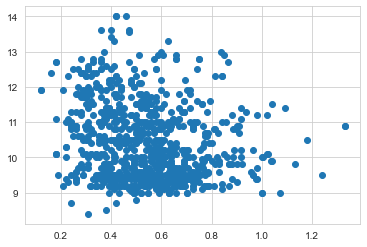

In [306]:
correlation_test(Ho, Ha, x1, y1)

### 17. alcohol and sulphates/citric_acid are pos correlated

In [307]:
#assign your null hypothesis
Ho = "No correlation between sulphates and alcohol."

#and your alternative hypothesis
Ha = "There is a correlation between sulphates and alcohol."

#the feature you are testing
x1 = train.sulphates

#against your target
y1 = train.alcohol

Reject null statment: No correlation between sulphates and alcohol.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.08745608014889056
    p: 0.008851294610011115
    
    


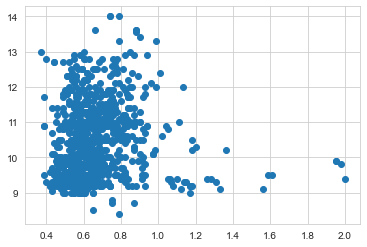

In [308]:
correlation_test(Ho, Ha, x1, y1)

In [309]:
#assign your null hypothesis
Ho = "No correlation between citric_acid and alcohol."

#and your alternative hypothesis
Ha = "There is a correlation between citric_acid and alcohol."

#the feature you are testing
x1 = train.citric_acid

#against your target
y1 = train.alcohol

Reject null statment: No correlation between citric_acid and alcohol.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.13678646915562398
    p: 4.029645401654197e-05
    
    


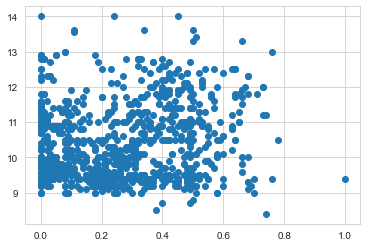

In [310]:
correlation_test(Ho, Ha, x1, y1)

In [302]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
417             7.0              0.58         0.12             1.9      0.091   
546             7.5              0.55         0.24             2.0      0.078   
516            12.5              0.60         0.49             4.3      0.100   
86              8.6              0.49         0.28             1.9      0.110   
1100            8.4              0.34         0.42             2.1      0.072   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
417                  34.0                 124.0  0.99560  3.44       0.48   
546                  10.0                  28.0  0.99830  3.45       0.78   
516                   5.0                  14.0  1.00100  3.25       0.74   
86                   20.0                 136.0  0.99720  2.93       1.95   
1100                 23.0                  36.0  0.99392  3.11       0.78   

      alcohol  quality  log_density_feature  
417      10.5        5             2.706348  
546       9.5        6             2.713665  
516      11.9        6             2.721001  
86        9.9        6             2.710681  
1100     12.4        6             2.701805

## Key Takeaways/Summary of stats tests
#### Hypothesis Testing Tested Hypotheses

#### Reject null statment: No correlation between alcohol and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.5058275857220219
    p: 2.5965006260626788e-59
        
#### Reject null statment: No correlation between sulphates and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13
        
#### Reject null statment: No correlation between citric_acid and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2383682513029749
    p: 4.989209803072576e-13

#### Reject null statment: No correlation between fixed_acidity and quality.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.11803244569675303
    p: 0.0004023084389424685

#### Fail to reject the null hypothesis, No correlation between pH and quality.

    Correlation Coefficient: -0.038358069617661736
    p: 0.2516465236893746
    
#### Reject null statment: No correlation between density and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.174558404107124
    p: 1.4779499074184612e-07
    
#### Reject null statment: No correlation between chlorides and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.1460824605018894
    p: 1.1453779437218817e-05    
    
#### Reject null statment: No correlation between volatile_acidity and quality.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3584259210477414
    p: 1.603311510782249e-28    
    
#### Reject null statment: No correlation between volatile_acidity and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2275161966675603
    p: 5.677707664026978e-12    
    
#### Reject null statment: No correlation between fixed_acidity and pH.
There is a linear relationship.
That is a stronger negative correlation.

    Correlation Coefficient: -0.6774772046025654
    p: 2.994590335706951e-121    
    
#### Reject null statment: No correlation between density and fixed_acidity.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6584479857364895
    p: 2.4694591590028873e-112  
    
#### Reject null statment: No correlation between citric_acid and fixed_acidity.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6591636479951968
    p: 1.17234854741529e-11    
    
#### Reject null statment: No correlation between density and residual_sugar.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3022513242796895
    p: 2.3129680662788886e-20   
    
#### Reject null statment: No correlation between sulphates and chlorides.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.41406803754829646
    p: 2.1665488025886728e-38   
    
#### Reject null statment: No correlation between total_sulfur_dioxide and free_sulfur_dioxide.
There is a linear relationship.
That is a stronger positive correlation.

    Correlation Coefficient: 0.6639099108524389
    p: 7.954306465817756e-115    
    
#### Reject null statment: No correlation between alcohol and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.4856180838868558
    p: 3.838446787937727e-54
    
#### Reject null statment: No correlation between pH and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3055236891962556
    p: 8.603892836217704e-21 
    
#### Reject null statment: No correlation between total_sulfur_dioxide and residual_sugar.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.21928953269875423
    p: 3.309341101606457e-11   
    
#### Reject null statment: No correlation between alcohol and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.4856180838868558
    p: 3.838446787937727e-54    
    
    
#### Reject null statment: No correlation between pH and density.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.3055236891962556
    p: 8.603892836217704e-21
        
#### Reject null statment: No correlation between residual_sugar and density.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3022513242796895
    p: 2.3129680662788886e-20        
    
#### Reject null statment: No correlation between citric_acid and density.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.34543531704713987
    p: 1.7562582408784856e-26
    
#### Reject null statment: No correlation between alcohol and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.17821748952438296
    p: 7.995740759796008e-08   
    
#### Reject null statment: No correlation between volatile_acidity and pH.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2275161966675603
    p: 5.677707664026978e-12   
    
#### Reject null statment: No correlation between sulphates and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.23916336733159424
    p: 4.1548865958634193e-13  
    
#### Reject null statment: No correlation between chlorides and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.27891352459231644
    p: 1.8676183371616188e-17 
    
#### Reject null statment: No correlation between citric_acid and pH.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.5413206361250693
    p: 2.817442656268688e-69
        
#### Reject null statment: No correlation between fixed_acidity and pH.
There is a linear relationship.
That is a stronger negative correlation.

    Correlation Coefficient: -0.6774772046025654
    p: 2.994590335706951e-121  
    
#### Reject null statment: No correlation between citric_acid and sulphates.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.3103433383861657
    p: 1.959592767310798e-21    

#### Reject null statment: No correlation between fixed_acidity and sulphates.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.19634638022541145
    p: 3.1506644894300042e-09

#### Reject null statment: No correlation between total_sulfur_dioxide and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.17560444195612174
    p: 1.2415217414599543e-07

#### Reject null statment: No correlation between chlorides and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.21703773215778008
    p: 5.297594732143102e-11
 
#### Reject null statment: No correlation between volatile_acidity and alcohol.
There is a linear relationship.
there is a negative weak one.

    Correlation Coefficient: -0.19169716149416383
    p: 7.443700489615805e-09 

#### Reject null statment: No correlation between sulphates and alcohol.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.08745608014889056
    p: 0.008851294610011115
    
#### Reject null statment: No correlation between citric_acid and alcohol.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.13678646915562398
    p: 4.029645401654197e-05    

### Bivariate and Multivariate analysis

In [343]:
#bin out the quality scores for further analysis

bins = [3,4,5,6,7,8]
labels = ['low = 3-4','lowaverage = 4-5','average = 5-6','good = 6-7','best > 7']
train['binqscore'] = pd.cut(train.quality, bins=bins,  labels=labels,  right=False, include_lowest=True)
# train['binqscore'] = pd.cut(train.quality, bins=bins,  right=False, include_lowest=True)

In [344]:
train.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
417             7.0              0.58         0.12             1.9      0.091   
546             7.5              0.55         0.24             2.0      0.078   
516            12.5              0.60         0.49             4.3      0.100   
86              8.6              0.49         0.28             1.9      0.110   
1100            8.4              0.34         0.42             2.1      0.072   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
417                  34.0                 124.0  0.99560  3.44       0.48   
546                  10.0                  28.0  0.99830  3.45       0.78   
516                   5.0                  14.0  1.00100  3.25       0.74   
86                   20.0                 136.0  0.99720  2.93       1.95   
1100                 23.0                  36.0  0.99392  3.11       0.78   

      alcohol  quality  log_density_feature      binqscore  
417      10.5        5             2.706348  average = 5-6  
546       9.5        6             2.713665     good = 6-7  
516      11.9        6             2.721001     good = 6-7  
86        9.9        6             2.710681     good = 6-7  
1100     12.4        6             2.701805     good = 6-7

In [345]:
train.binqscore.value_counts()

average = 5-6       391
good = 6-7          349
best > 7            112
lowaverage = 4-5     34
low = 3-4             4
Name: binqscore, dtype: int64

In [346]:
train.quality.value_counts()

5    391
6    349
7    112
4     34
8      5
3      4
Name: quality, dtype: int64

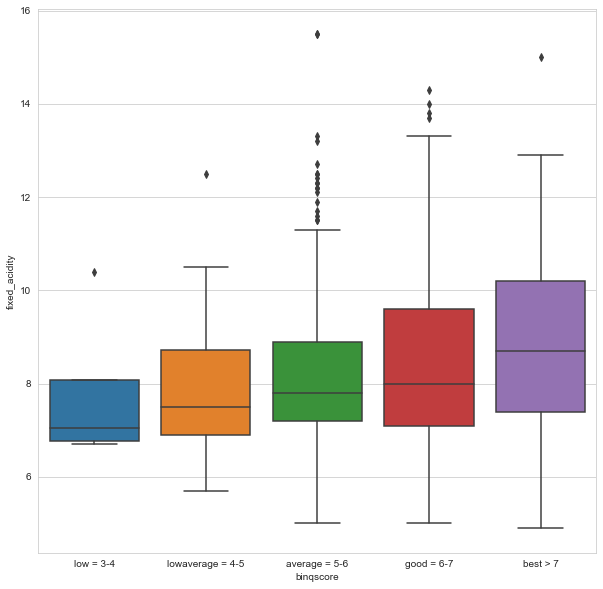

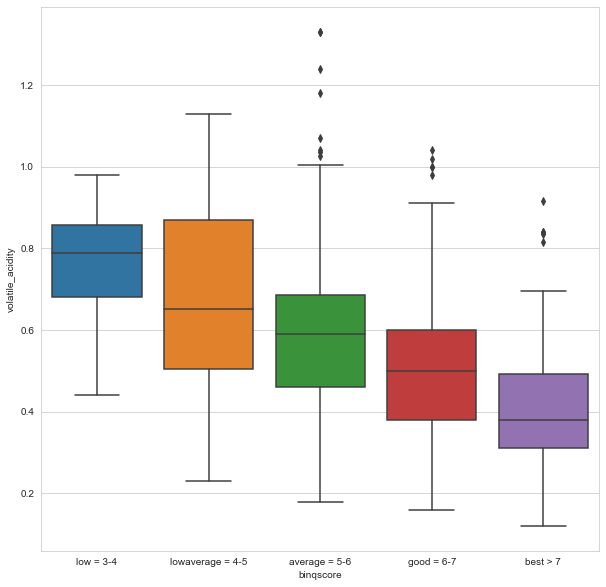

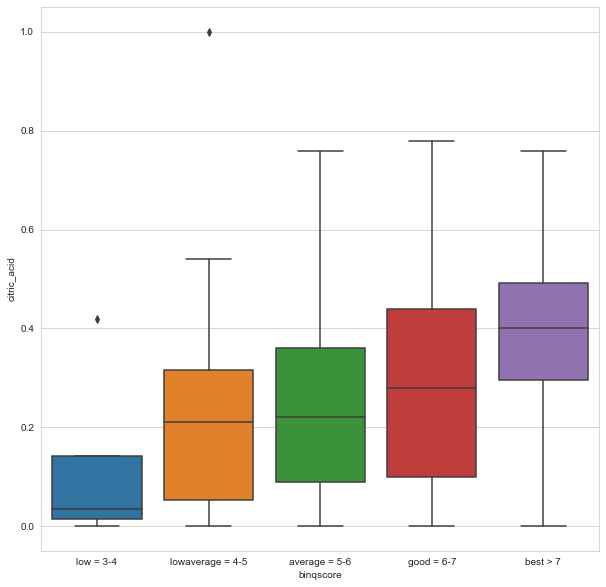

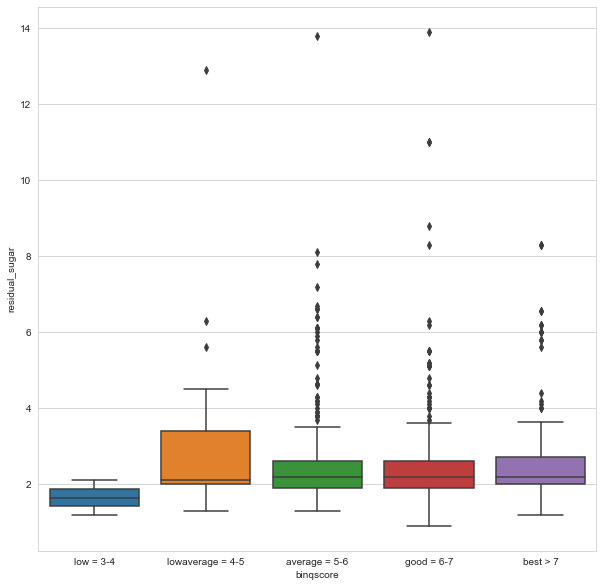

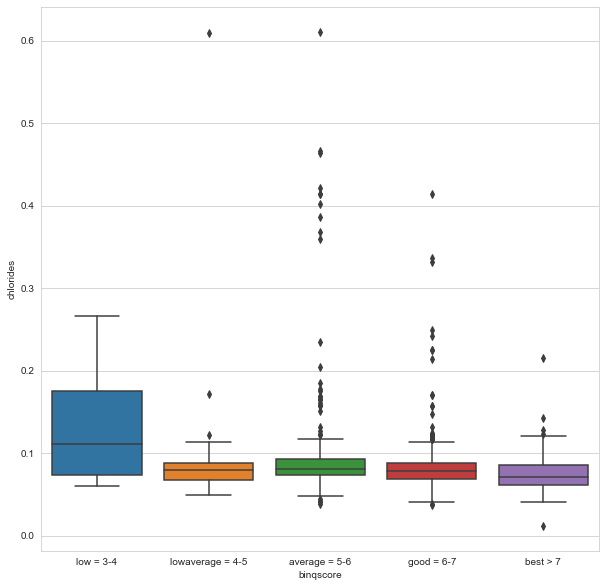

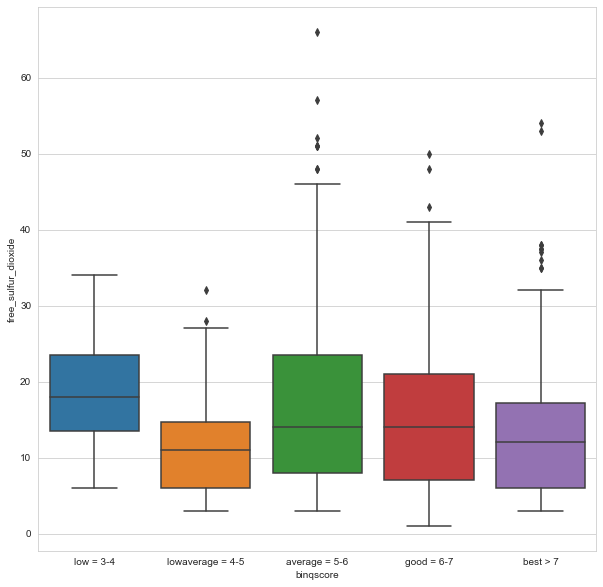

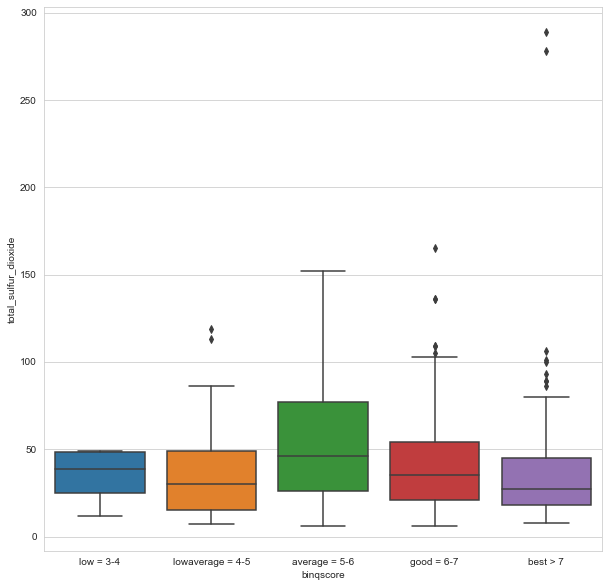

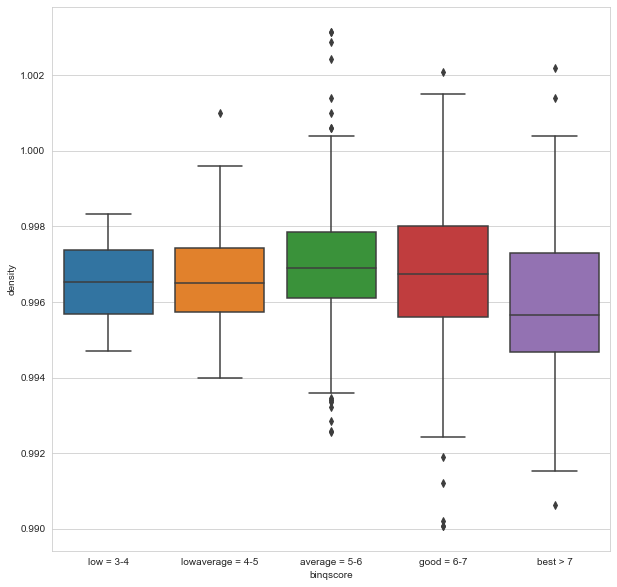

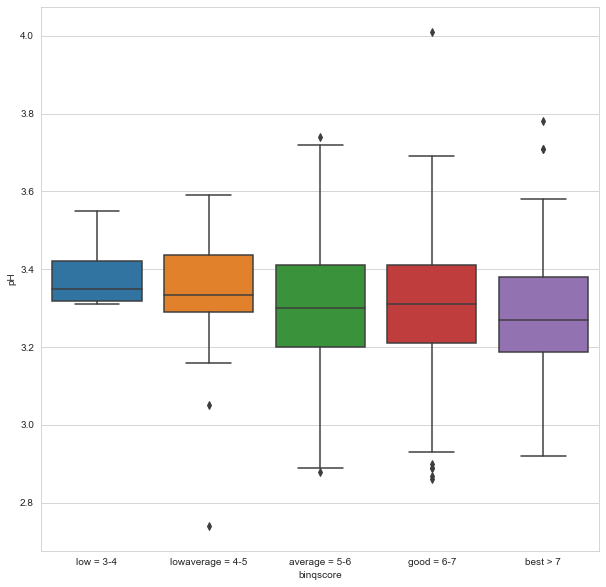

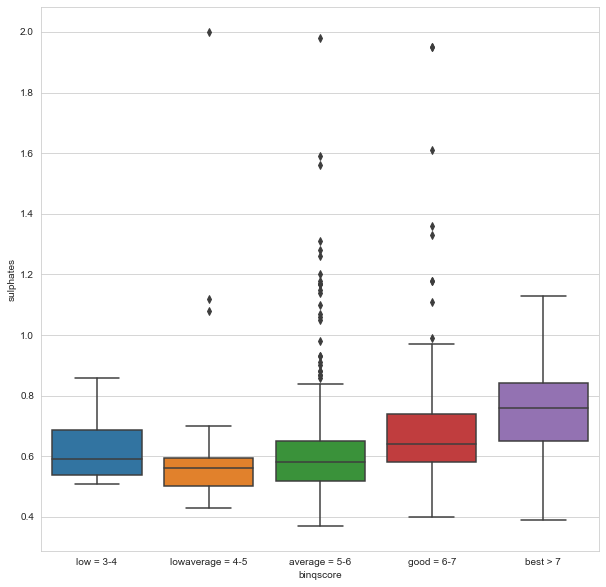

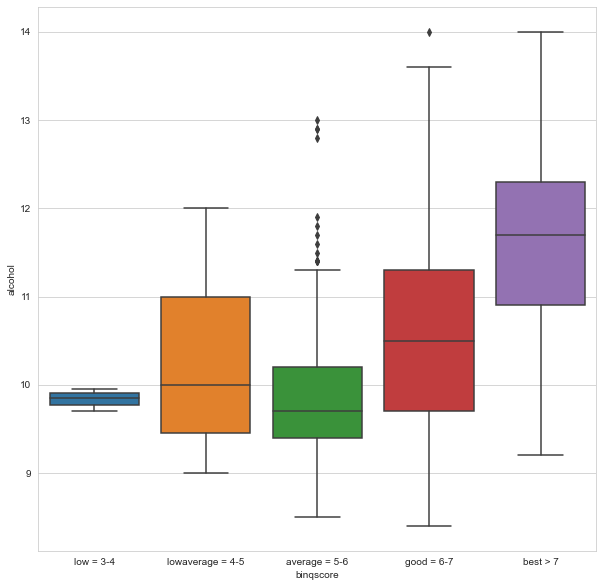

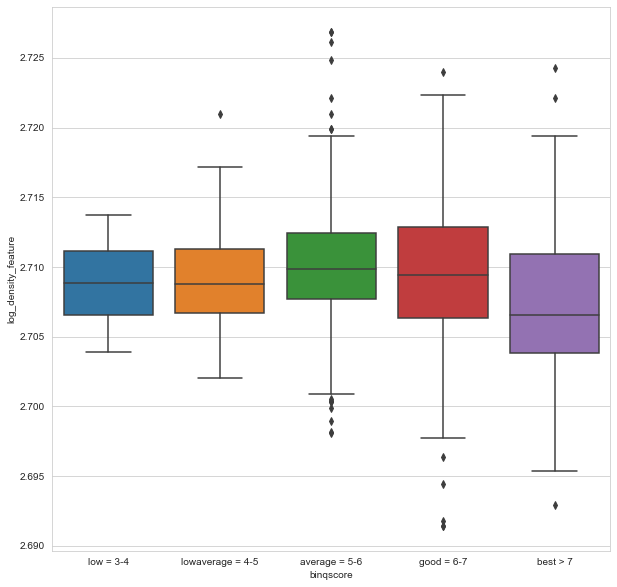

In [347]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.fixed_acidity, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.volatile_acidity, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.citric_acid, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.residual_sugar, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.chlorides, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.free_sulfur_dioxide, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.total_sulfur_dioxide, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.density, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.pH, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.sulphates, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.alcohol, data=train)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x=train.binqscore, y=train.log_density_feature, data=train)
plt.show()



### pairplot

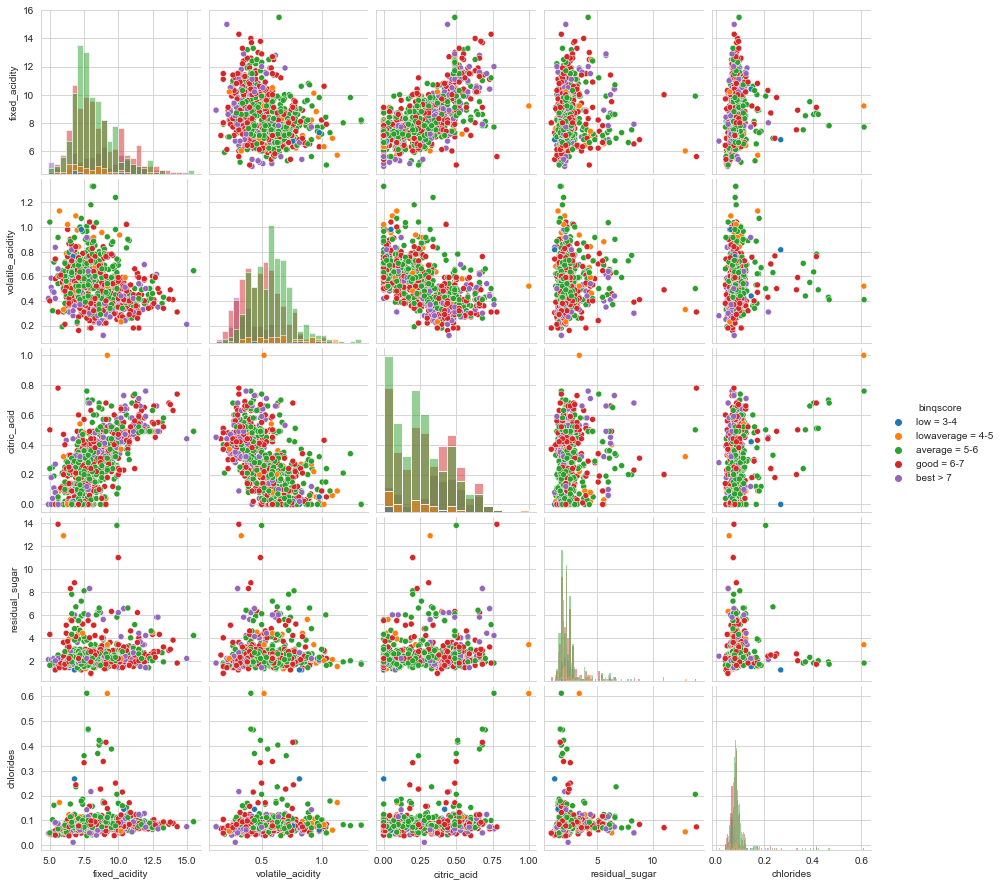

In [348]:
sns.pairplot(train, x_vars=['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides'],
    y_vars=['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides'], 
    hue="binqscore", diag_kind="hist")

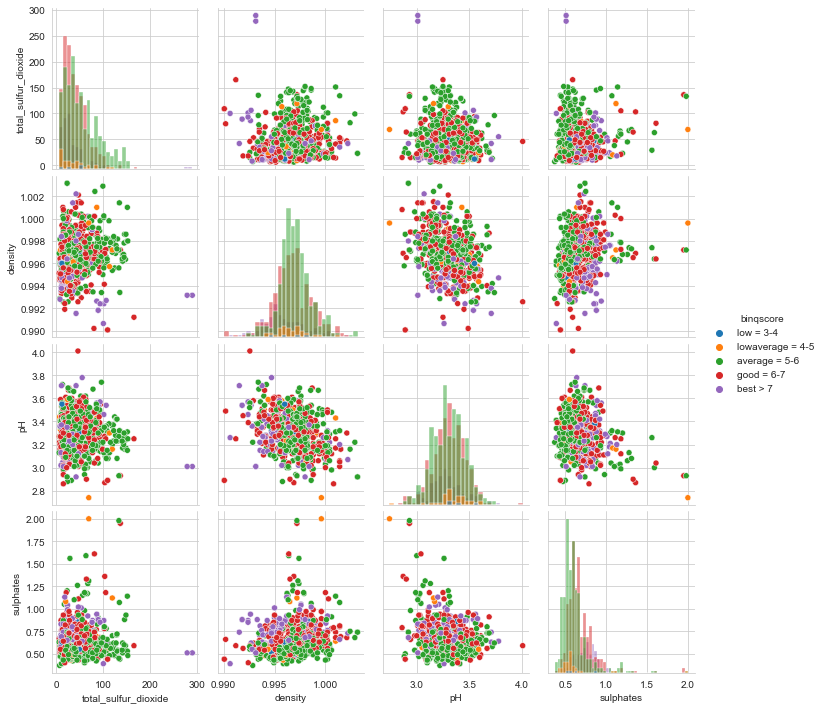

In [349]:
sns.pairplot(train, x_vars=['total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates'],
    y_vars=['total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates'], 
    hue="binqscore", diag_kind="hist")

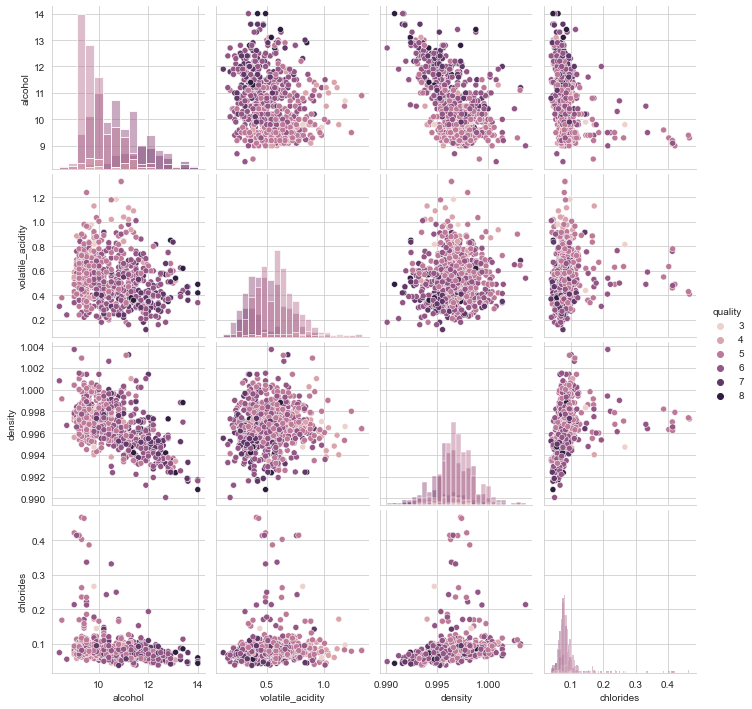

In [426]:
sns.pairplot(train, x_vars=['alcohol',
 'volatile_acidity',
 'density',
 'chlorides'],
    y_vars=['alcohol',
 'volatile_acidity',
 'density',
 'chlorides'], 
    hue="quality", diag_kind="hist")

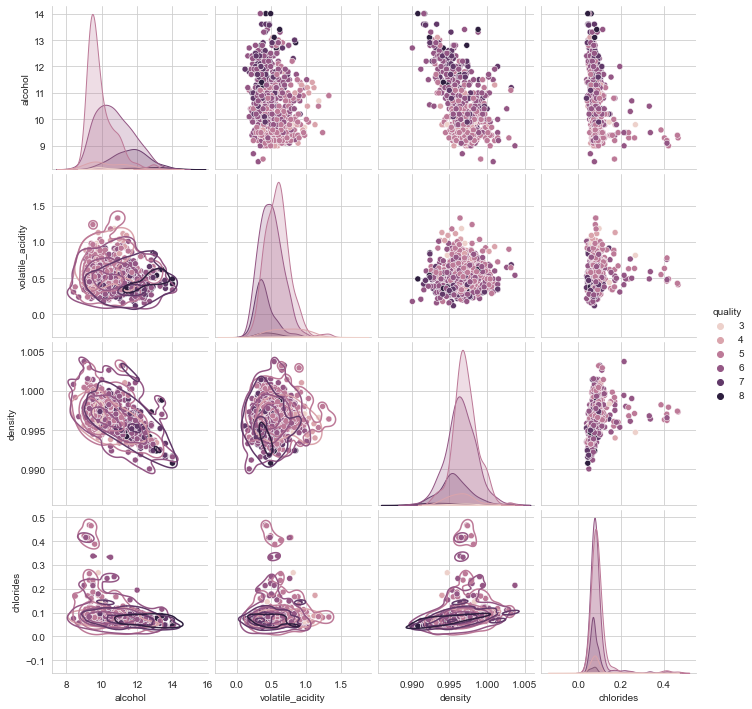

In [424]:
g = sns.pairplot(train, x_vars=['alcohol',
 'volatile_acidity',
 'density',
 'chlorides'],
    y_vars=['alcohol',
 'volatile_acidity',
 'density',
 'chlorides'], 
    hue="quality", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

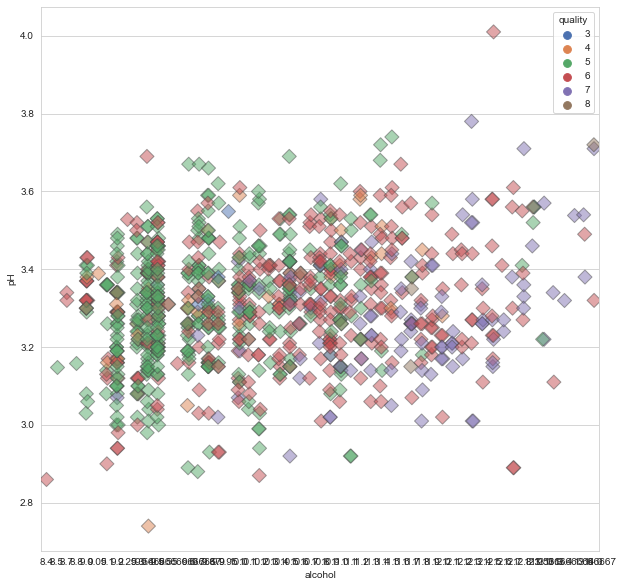

In [365]:
plt.figure(figsize=(10,10))
sns.stripplot(data=train, x="alcohol", y="pH", hue="quality", palette="deep",s=10, marker="D", linewidth=1, alpha=.5)

In [498]:
train.quality.value_counts()

5    325
6    301
7     87
4     33
8     10
3      4
Name: quality, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='density'>

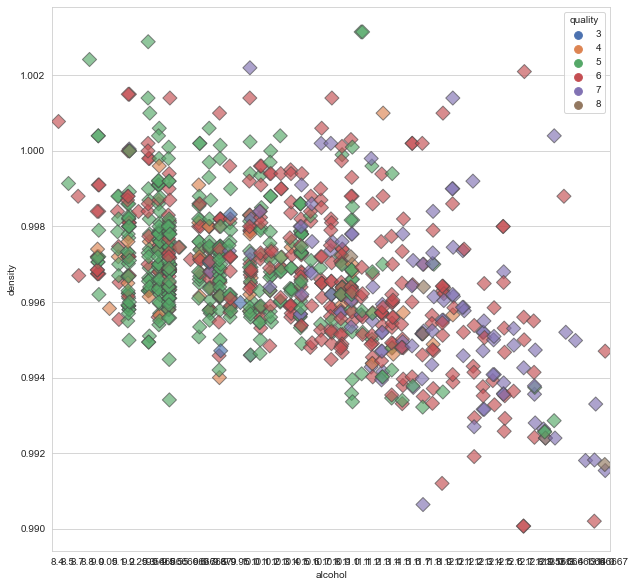

In [368]:
plt.figure(figsize=(10,10))
sns.stripplot(data=train, x="alcohol", y="density", hue="quality", palette="deep",s=10, marker="D", linewidth=1, alpha=.65)

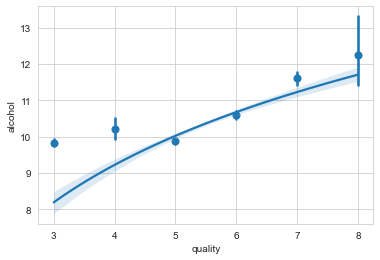

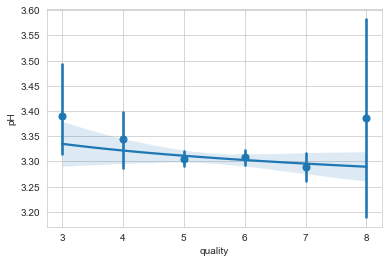

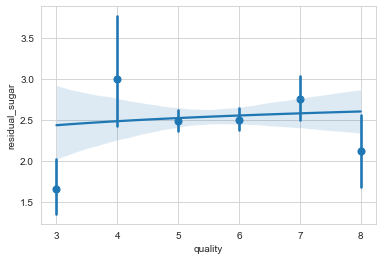

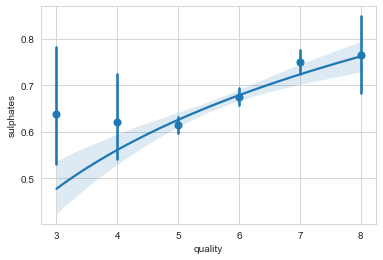

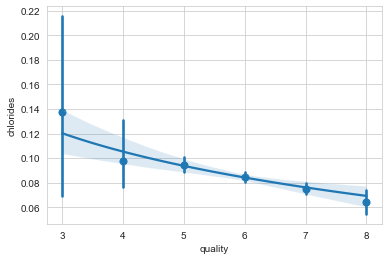

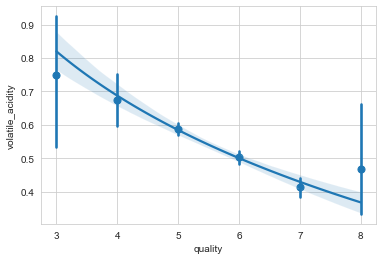

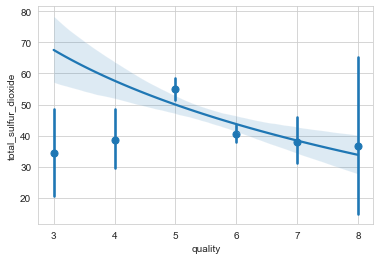

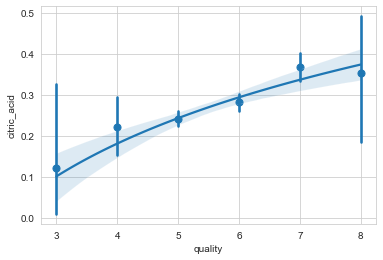

In [370]:
ax = sns.regplot(x="quality", y="alcohol", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="pH", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="residual_sugar", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="sulphates", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="chlorides", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="volatile_acidity", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="total_sulfur_dioxide", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()
ax = sns.regplot(x="quality", y="citric_acid", data=train,
                 x_estimator=np.mean, logx=True)
plt.show()

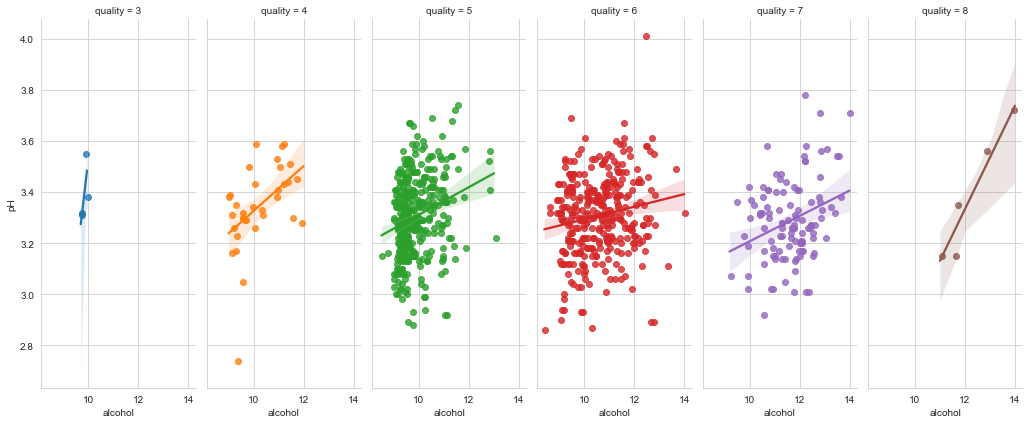

In [372]:
g = sns.lmplot(x="alcohol", y="pH", hue="quality", col="quality",
               data=train, height=6, aspect=.4, x_jitter=.1)

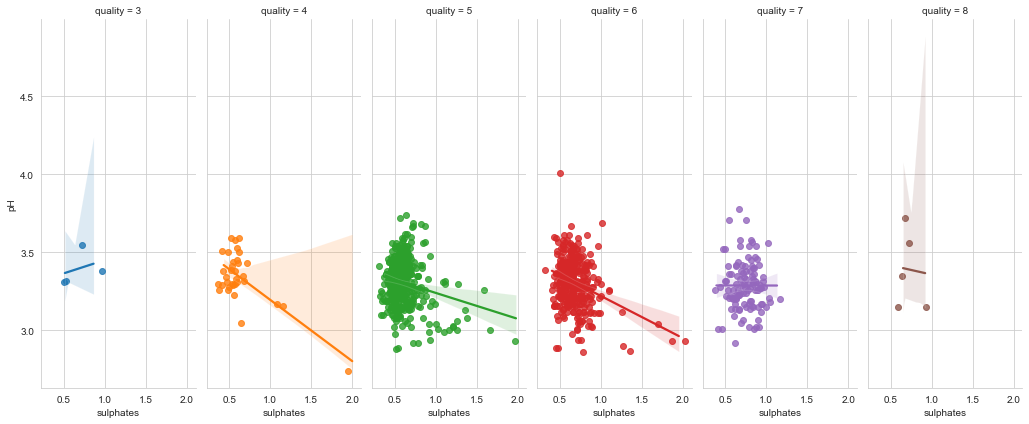

In [374]:
g = sns.lmplot(x="sulphates", y="pH", hue="quality", col="quality",
               data=train, height=6, aspect=.4, x_jitter=.1)

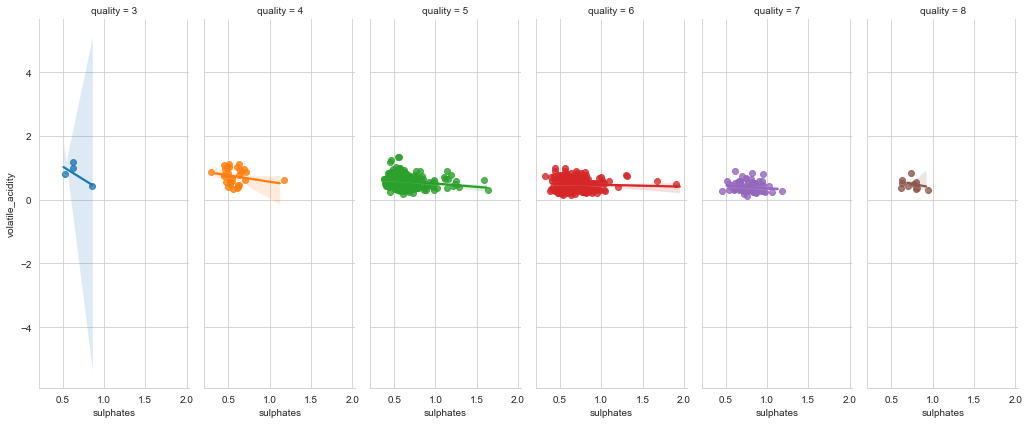

In [499]:
g = sns.lmplot(x="sulphates", y="volatile_acidity", hue="quality", col="quality",
               data=train, height=6, aspect=.4, x_jitter=.1)

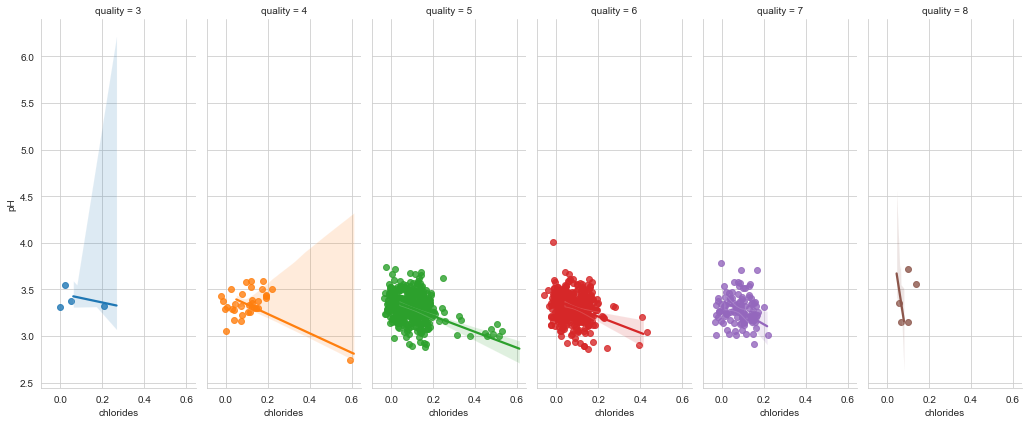

In [375]:
g = sns.lmplot(x="chlorides", y="pH", hue="quality", col="quality",
               data=train, height=6, aspect=.4, x_jitter=.1)

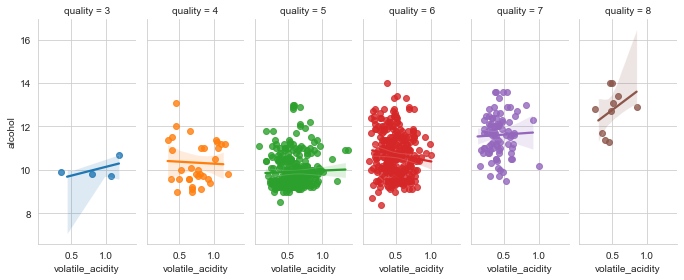

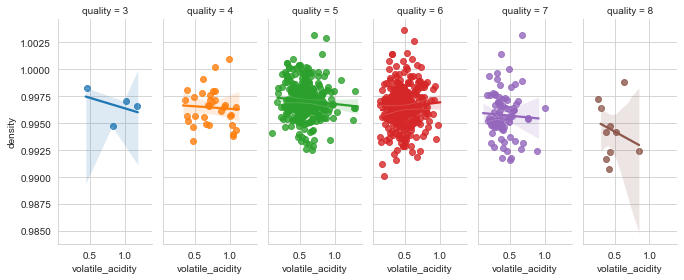

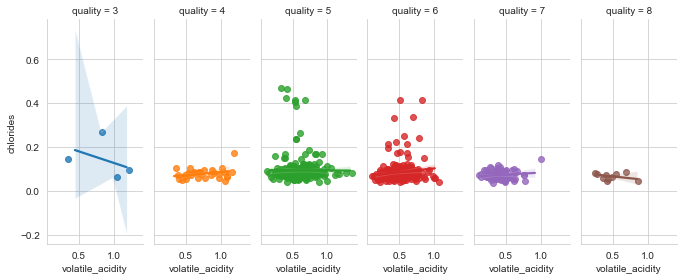

In [429]:
g = sns.lmplot(x="volatile_acidity", y="alcohol", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="volatile_acidity", y="density", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="volatile_acidity", y="chlorides", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()

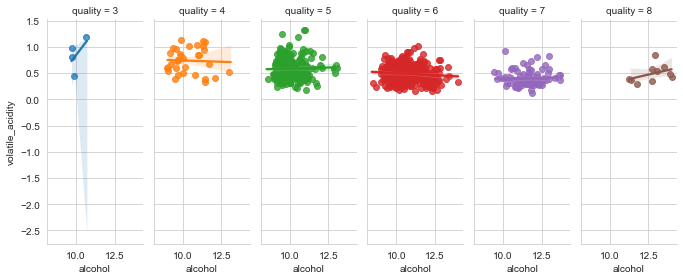

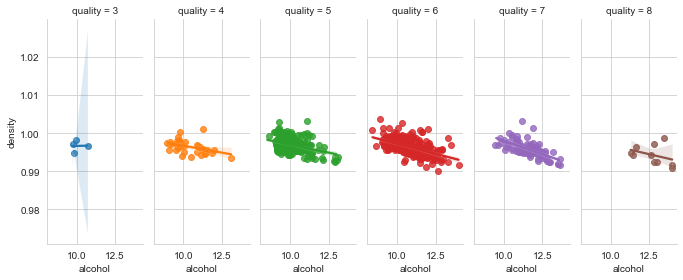

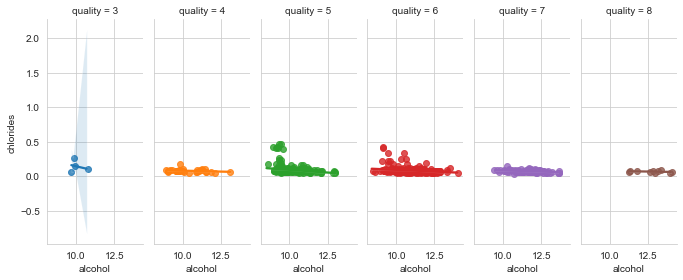

In [430]:
g = sns.lmplot(x="alcohol", y="volatile_acidity", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="alcohol", y="density", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="alcohol", y="chlorides", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()

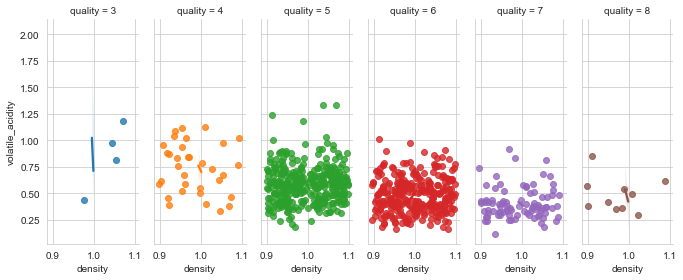

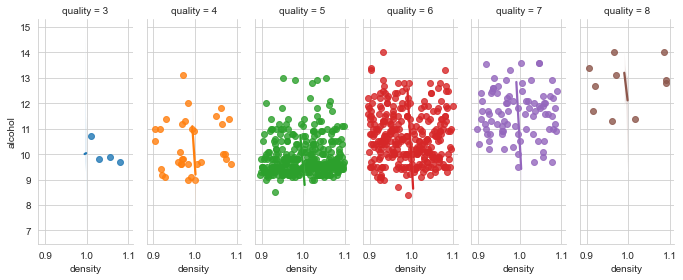

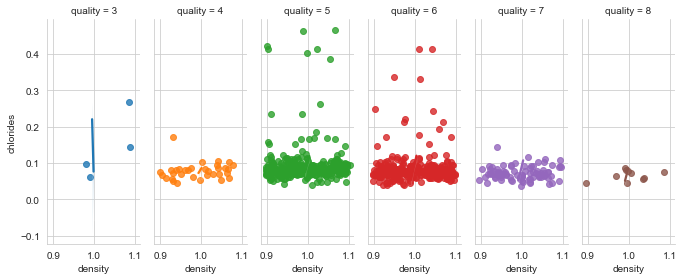

In [431]:
g = sns.lmplot(x="density", y="volatile_acidity", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="density", y="alcohol", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="density", y="chlorides", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()

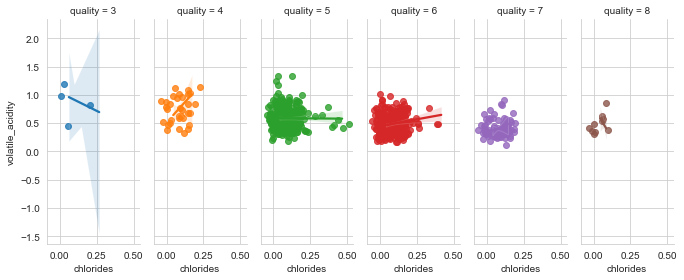

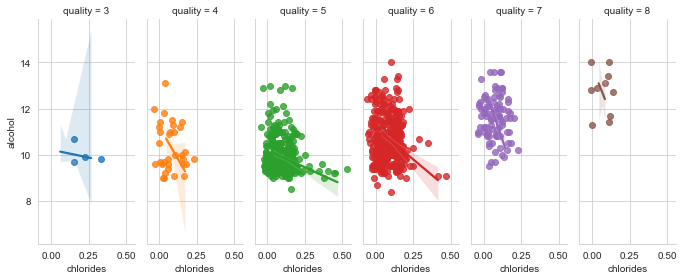

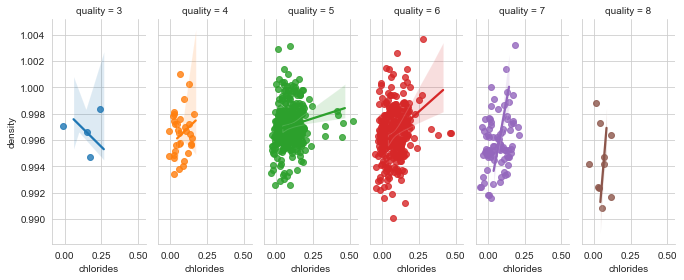

In [432]:
g = sns.lmplot(x="chlorides", y="volatile_acidity", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="alcohol", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="density", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()

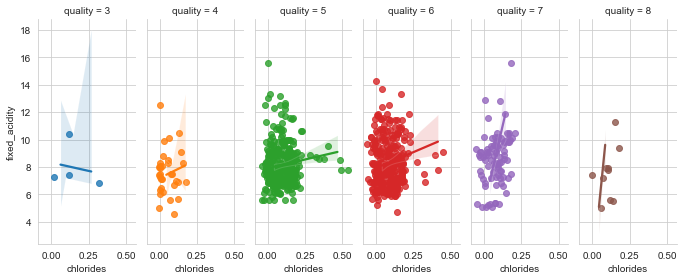

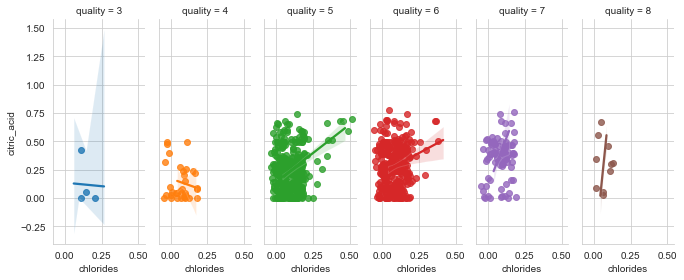

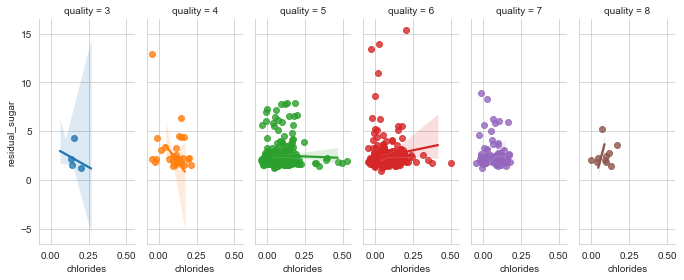

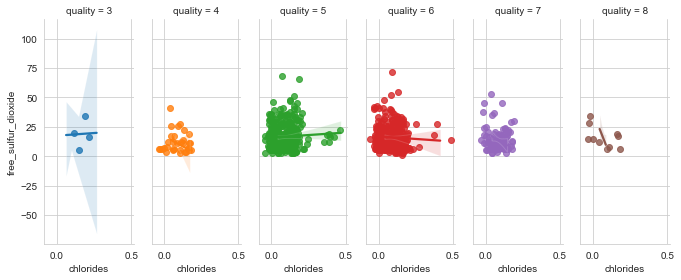

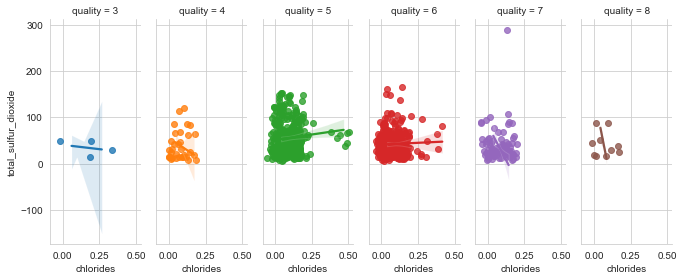

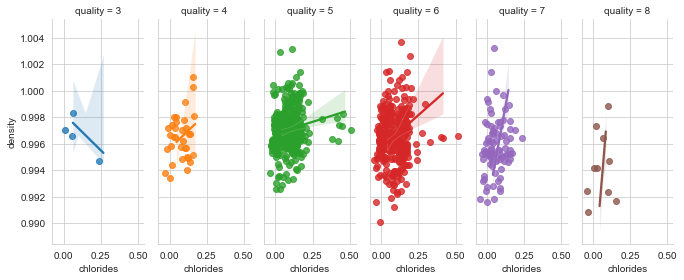

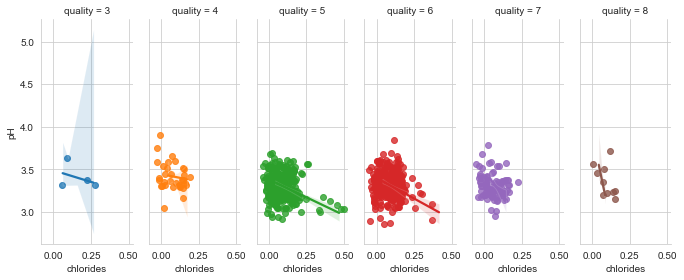

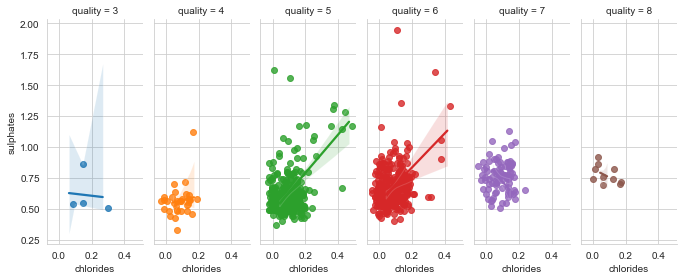

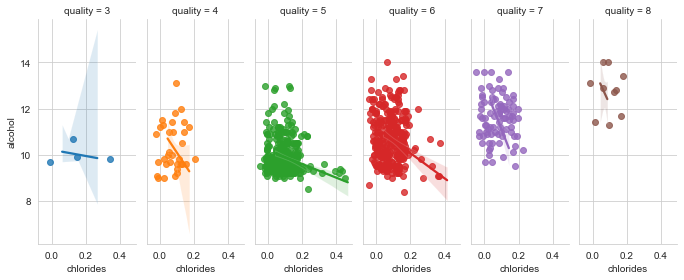

In [434]:
g = sns.lmplot(x="chlorides", y="fixed_acidity", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="citric_acid", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="residual_sugar", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="free_sulfur_dioxide", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="total_sulfur_dioxide", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="density", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="pH", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="sulphates", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()
g = sns.lmplot(x="chlorides", y="alcohol", hue="quality", col="quality",
               data=train, height=4, aspect=.4, x_jitter=.1)
plt.show()

In [433]:
train.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

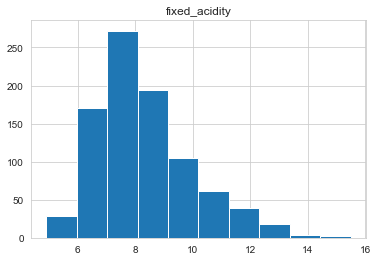

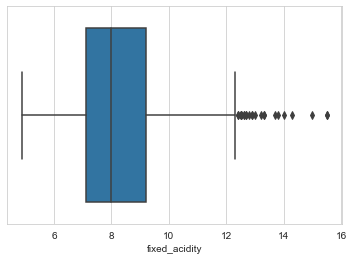

--------


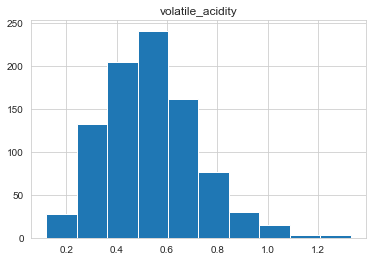

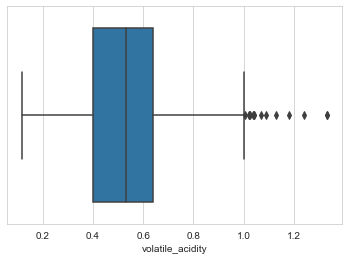

--------


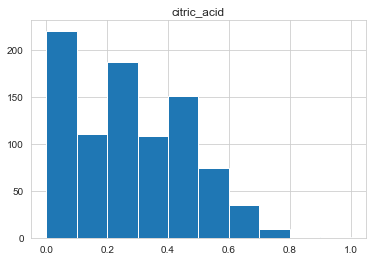

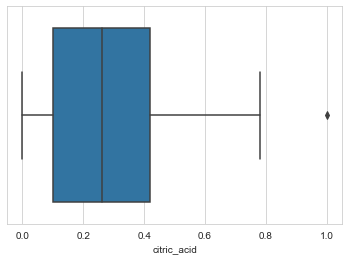

--------


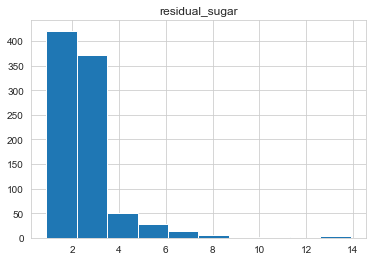

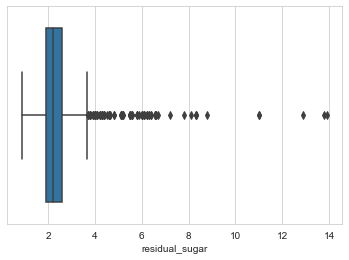

--------


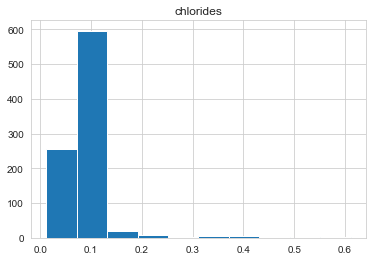

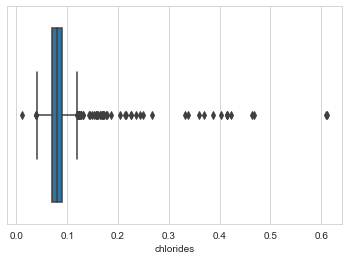

--------


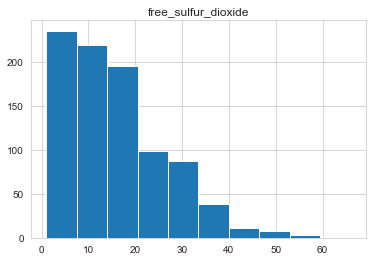

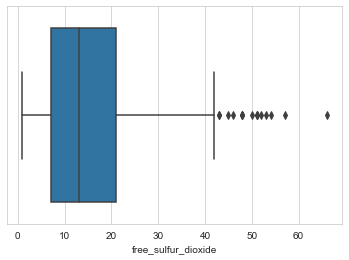

--------


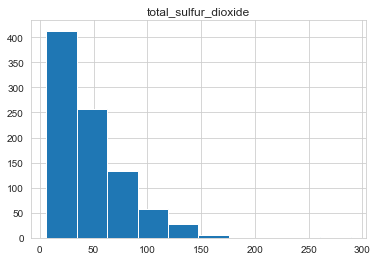

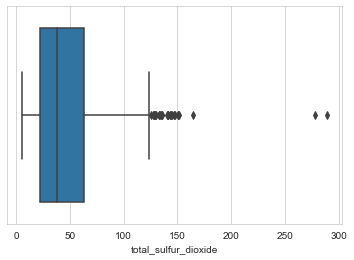

--------


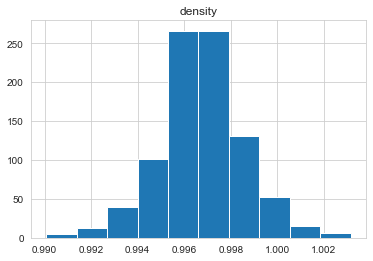

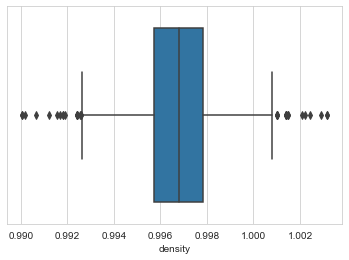

--------


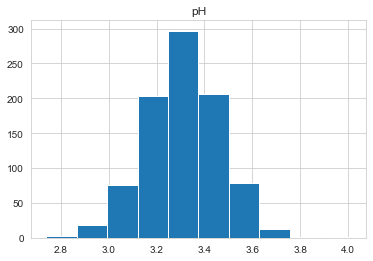

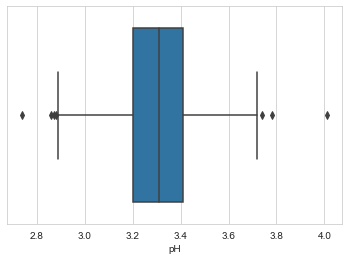

--------


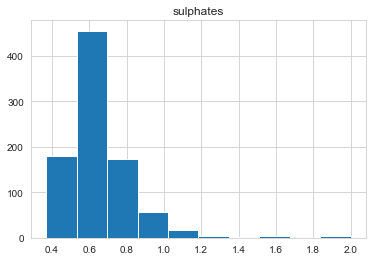

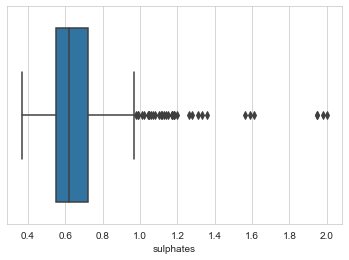

--------


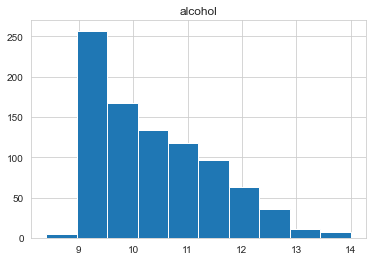

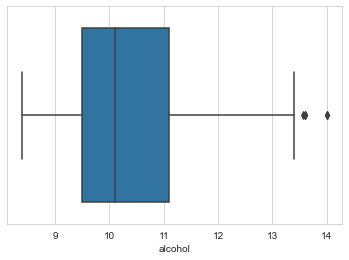

--------


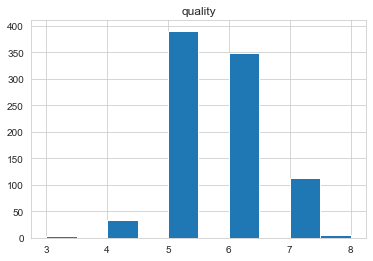

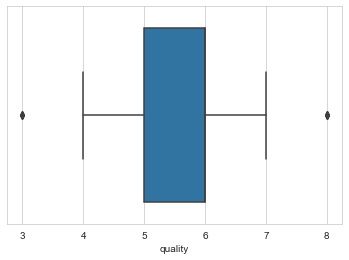

--------


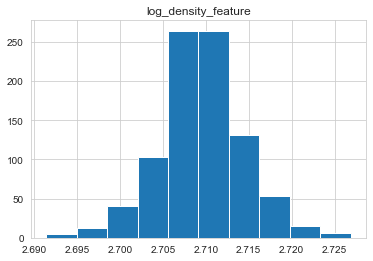

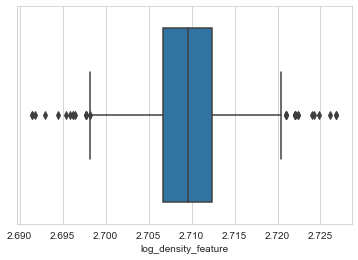

--------


TypeError: Cannot interpret 'CategoricalDtype(categories=['low = 3-4', 'lowaverage = 4-5', 'average = 5-6',
                  'good = 6-7', 'best > 7'],
, ordered=True)' as a data type

In [381]:
for col in train.columns:
    if np.issubdtype(train[col].dtype, np.number):
        train[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=train, x=col)
        plt.show()
        print('--------')

In [337]:
train.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'log_density_feature',
 'binqscore']

In [441]:
def jointplot(x, y, df):
    '''
    jointplot will take in a feature("x") and a target("y") 
    and plot a corresponding scatter and distribution.
    '''
    
    p = sns.jointplot(x=x, y=y, data=df, kind="hex", color="mediumslateblue")
    
    return p

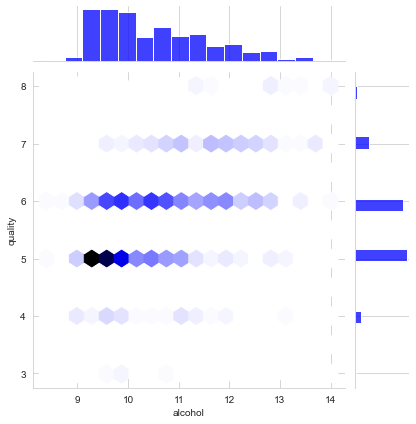

In [446]:
sns.jointplot(x='alcohol', y='quality', data=train, kind="hex", color="blue")

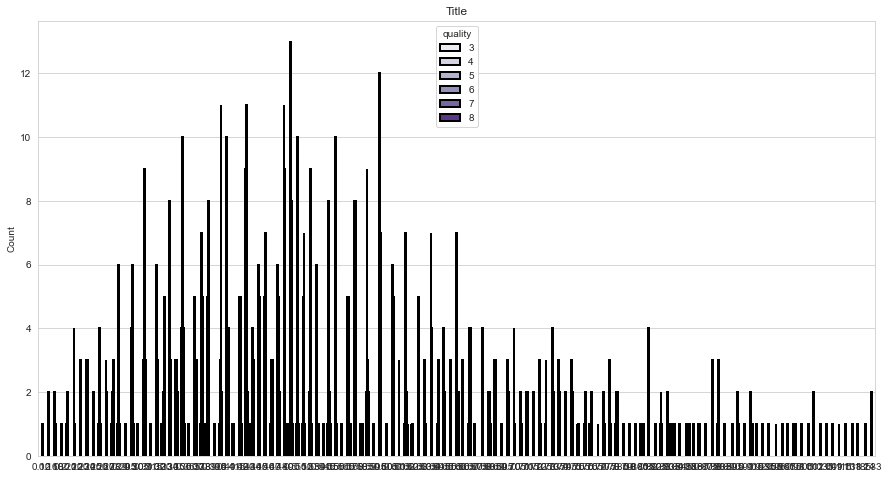

In [471]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'volatile_acidity', hue='quality', data=train, palette='Purples', ec='black', linewidth=2)

plt.title('Title')
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [447]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_train)

train_mms = mms.transform(X_train)

In [448]:
#scaled back into df
X_train_scaled = pd.DataFrame(train_mms, columns=list(X_train.columns))

In [449]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_validate)

validate_mms = mms.transform(X_validate)

In [450]:
#scaled back into df
X_validate_scaled = pd.DataFrame(validate_mms, columns=list(X_validate.columns))

In [451]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_test)

test_mms = mms.transform(X_test)

In [452]:
#scaled back into df
X_test_scaled = pd.DataFrame(test_mms, columns=list(X_test.columns))

In [453]:
X_test_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             0.41          0.439286         0.00        0.097902   0.096491   
1             0.49          0.121429         0.55        0.062937   0.036842   
2             0.22          0.303571         0.02        0.048951   0.096491   
3             0.36          0.442857         0.11        0.076923   0.075439   
4             0.19          0.164286         0.31        0.055944   0.066667   
..             ...               ...          ...             ...        ...   
267           0.22          0.150000         0.44        0.097902   0.043860   
268           0.16          0.307143         0.00        0.027972   0.049123   
269           0.28          0.100000         0.44        0.104895   0.110526   
270           0.19          0.221429         0.19        0.034965   0.066667   
271           0.24          0.560714         0.00        0.069930   0.082456   

     free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0               0.178571              0.066667  0.727891  0.480315   0.282209   
1               0.071429              0.022222  0.532313  0.409449   0.257669   
2               0.160714              0.085185  0.353741  0.566929   0.098160   
3               0.196429              0.085185  0.600340  0.519685   0.067485   
4               0.357143              0.159259  0.496599  0.574803   0.110429   
..                   ...                   ...       ...       ...        ...   
267             0.375000              0.148148  0.348639  0.440945   0.288344   
268             0.053571              0.000000  0.265306  0.464567   0.000000   
269             0.125000              0.033333  0.551020  0.464567   0.251534   
270             0.214286              0.066667  0.393707  0.503937   0.165644   
271             0.267857              0.088889  0.571429  0.661417   0.184049   

      alcohol  
0    0.132075  
1    0.358491  
2    0.584906  
3    0.226415  
4    0.150943  
..        ...  
267  0.528302  
268  0.320755  
269  0.433962  
270  0.207547  
271  0.283019  

[272 rows x 11 columns]

In [464]:

# from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 6 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [465]:
f_feature

['volatile_acidity',
 'citric_acid',
 'total_sulfur_dioxide',
 'density',
 'sulphates',
 'alcohol']

In [466]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [467]:
rfe_feature

['volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

#### clustering

In [481]:
#Create a new X subset with 3 features
X1_train = X_train_scaled[['volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']]
X1_validate = X_validate_scaled[['volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']]
X1_test = X_test_scaled[['volatile_acidity', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']]

In [484]:

#Fit a KMeans model to my 6 feature dataset
kmeans1 = KMeans(n_clusters=6)

kmeans1.fit(X1_train)

kmeans1.predict(X1_train)

array([4, 1, 1, 5, 5, 0, 2, 4, 0, 2, 0, 5, 5, 5, 5, 1, 5, 5, 4, 1, 2, 2,
       1, 1, 1, 3, 4, 5, 4, 3, 4, 4, 0, 0, 4, 1, 5, 5, 1, 4, 0, 4, 5, 1,
       2, 5, 3, 4, 3, 4, 1, 5, 5, 0, 5, 5, 5, 2, 0, 5, 1, 4, 0, 1, 1, 4,
       2, 5, 0, 1, 1, 1, 0, 5, 5, 5, 5, 0, 2, 0, 4, 0, 2, 1, 4, 2, 1, 5,
       2, 4, 2, 5, 1, 1, 1, 5, 4, 5, 4, 5, 4, 1, 4, 5, 1, 1, 1, 5, 1, 0,
       1, 1, 1, 5, 4, 0, 2, 4, 4, 5, 2, 5, 4, 4, 2, 0, 5, 2, 5, 5, 5, 2,
       0, 1, 5, 4, 5, 1, 5, 4, 5, 2, 1, 5, 4, 4, 1, 2, 1, 2, 1, 2, 1, 1,
       5, 0, 4, 5, 5, 0, 0, 0, 5, 0, 1, 4, 4, 4, 1, 0, 4, 1, 4, 4, 0, 4,
       2, 4, 3, 1, 0, 5, 0, 2, 1, 1, 0, 0, 1, 4, 4, 5, 2, 1, 0, 4, 0, 5,
       2, 5, 5, 5, 1, 1, 5, 1, 0, 5, 5, 5, 1, 0, 1, 1, 5, 1, 0, 4, 5, 4,
       4, 1, 4, 1, 5, 5, 1, 5, 5, 4, 5, 1, 5, 4, 2, 1, 5, 2, 2, 2, 5, 5,
       1, 2, 1, 1, 5, 5, 5, 5, 5, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0,
       5, 1, 1, 1, 0, 5, 5, 5, 0, 1, 4, 0, 0, 4, 5, 5, 1, 0, 0, 0, 4, 1,
       1, 1, 5, 0, 2, 1, 0, 3, 0, 4, 0, 2, 4, 0, 4,

In [485]:
#Store my predictions in the dataframe
X_train_scaled['rfe_cluster'] = kmeans1.predict(X1_train)
X_validate_scaled['rfe_cluster'] = kmeans1.predict(X1_validate)
X_test_scaled['rfe_cluster'] = kmeans1.predict(X1_test)

In [488]:
X_train_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.309091          0.214876     0.564103        0.068966   0.139860   
1       0.281818          0.450413     0.000000        0.103448   0.121212   
2       0.736364          0.396694     0.833333        0.096552   0.058275   
3       0.481818          0.314050     0.307692        0.096552   0.151515   
4       0.218182          0.305785     0.628205        0.324138   0.051282   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.070423              0.031802  0.406021  0.423077   0.191358   
1             0.098592              0.045936  0.538179  0.394231   0.246914   
2             0.070423              0.067138  0.707048  0.163462   0.148148   
3             0.070423              0.028269  0.567548  0.461538   0.117284   
4             0.352113              0.406360  0.538179  0.461538   0.265432   

    alcohol  rfe_cluster  
0  0.535714            4  
1  0.160714            1  
2  0.267857            1  
3  0.285714            5  
4  0.375000            5

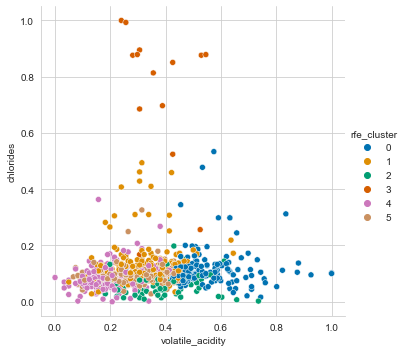

In [489]:
#Visualize my results
sns.relplot(x='volatile_acidity', y='chlorides', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

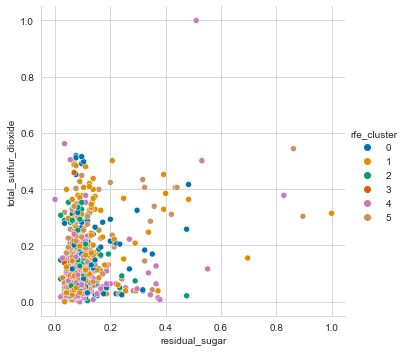

In [490]:
#Visualize my results
sns.relplot(x='residual_sugar', y='total_sulfur_dioxide', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

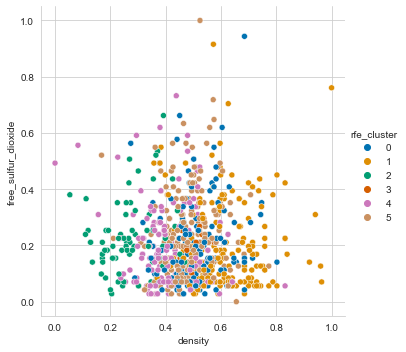

In [491]:
#Visualize my results
sns.relplot(x='density', y='free_sulfur_dioxide', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

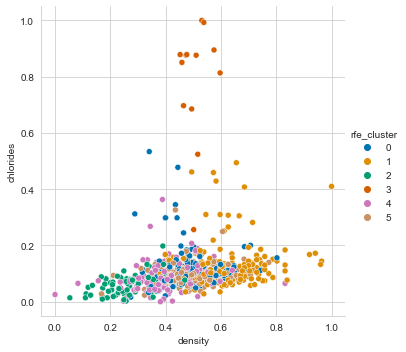

In [492]:
#Visualize my results
sns.relplot(x='density', y='chlorides', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

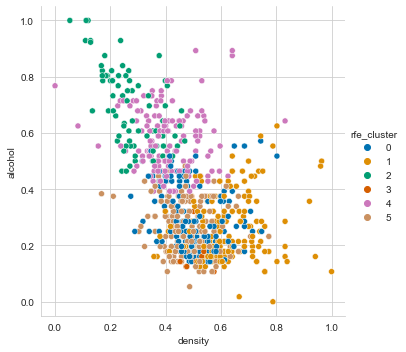

In [493]:
#Visualize my results
sns.relplot(x='density', y='alcohol', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

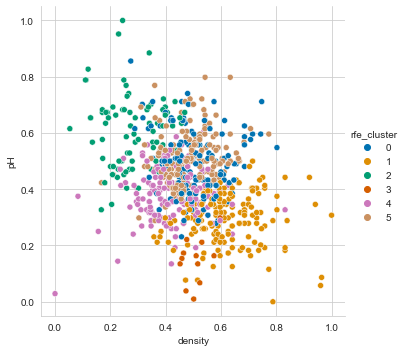

In [494]:
#Visualize my results
sns.relplot(x='density', y='pH', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

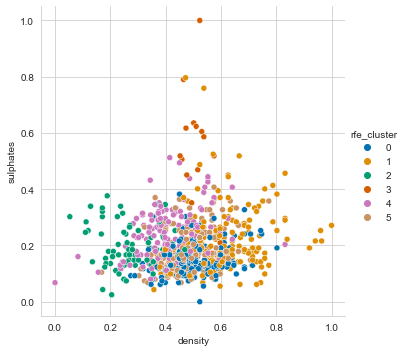

In [495]:
#Visualize my results
sns.relplot(x='density', y='sulphates', hue='rfe_cluster',
            palette='colorblind', data=X_train_scaled)

In [500]:
#Create a list of inertias for models fit to my 3 features
rfe_cluster = []

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X1_train)
    rfe_cluster.append(kmeans.inertia_)
    
rfe_cluster 

[68.48298128885307,
 57.93407349322778,
 50.23937621760339,
 45.02758231234213,
 40.53307284263667,
 36.97414611222001]

Text(0.5, 0, 'Number of clusters')

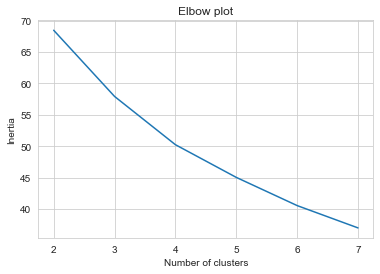

In [501]:
#Plot the inertia over number of clusters
sns.lineplot(x=range(2, 8), y=rfe_cluster)
plt.title('Elbow plot')
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')

In [230]:
def spearman_correllation_test(df, x, y, alpha=0.05):
    from scipy.stats import spearmanr

    stat, p = spearmanr(df[x], df[y])
    result={'reject': p < alpha,
        'h0' : f"The samples of '{x}' and '{y}' are independant",
        'stat_name': 'correlation',
        'stat': stat,
        'p_value': p,
        'alpha': alpha
    }
    return result

In [ ]:
def correlation_test(Ho, Ha, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = Ho
    alternative_hypothesis = Ha
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("there is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("there is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

In [ ]:
def correlation_test(Ho, Ha, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = Ho
    alternative_hypothesis = Ha
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("there is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("there is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

In [ ]:
bins = [0, 1, 5, 10, 25, 50, 100]
df['binned'] = pd.cut(df['percentage'], bins)

In [ ]:
train, x=train.total_sulfur_dioxide, y=train.residual_sugar, alpha=0.05)

#### Heatmap takeaways:
1. strong pos correlation between alcohol and quality
2. pos correlation between sulphates/citric acid/fixed acidity and quality
3. neg correlation between ph/density/chlorides and quality
4. strong neg correlation between volatile_acidity and quality
5. ph and fixed/volatile_acidity as expected are correlated
6. fixed_acidity and density/citric_acid are strongly correlated
7. residual_sugar and density are correlated
8. chlorides and sulphates are correlated
9. free_sulfur_dioxide and total SO2 as expected are correlated
10. residual_sugar and total_sulfur_dioxide are strongly negatively correlated
11. density and alcohol/ph are strongly negatively correlated
12. density and residual_sugar/citric_acid are pos correlated
13. ph and alcohol/volatile_acidity are pos correlated
14. ph and sulphates/chlorides/citric_acid/fixed_acidity are neg correlated, as expected -> compounds effect ph
15. sulfates and citric_acid/fixed_acidity are pos correlated
16. alcohol and total_sulfur_dioxide/chlorides/volatile_acidity are neg correlated
17. alcohol and sulphates/citric_acid are pos correlated
